<a href="https://colab.research.google.com/github/rnabilahusna/MP_ProductReview/blob/main/sentiment_analysis_skincare_product_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

#set warning
import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

In [6]:
file_paths = [
    # acne and oily skin
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cleanser/cleanser-oily-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/cream/cream-oily-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/moisturizer/moisturizer-oily-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/acne-oily-skin/serum/serum-oily-la-roche-posay-5-stars.csv',

    # anti-aging skin
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/cream/cream-anti-aging-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/eye-serum/eye-serum-anti-aging-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/anti-aging-skin/serum/serum-anti-aging-la-roche-posay-5-stars.csv',

    # dry skin
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/cleanser/cleanser-dry-skin-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/moisturizer/moisturizer-dry-skin-la-roche-posay-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-cerave-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-cerave-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-cerave-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-cerave-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-cerave-5-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-la-roche-posay-1-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-la-roche-posay-2-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-la-roche-posay-3-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-la-roche-posay-4-stars.csv',
    '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/dry-skin/serum/serum-dry-skin-la-roche-posay-5-stars.csv',
]

# Create an empty list to store DataFrames
dataframes = []

# Read each CSV file into a DataFrame and append to the list
for file_path in file_paths:
    d_frame = pd.read_csv(file_path)
    dataframes.append(d_frame)

# Merge all DataFrames into one
df = pd.concat(dataframes, ignore_index=True)

# Display the merged DataFrame
df

,product,date,title,rating,body,helpful_count
0,Amazon.com: Customer reviews: CeraVe Foaming F...,28/07/2021,1.0 out of 5 stars\nthere’s no way these revie...,1.0,I bought this because I’ve had really oily ski...,2
1,Amazon.com: Customer reviews: CeraVe Foaming F...,23/07/2023,1.0 out of 5 stars\nNot paraben free,1.0,I don’t understand how these brand name compan...,3
2,Amazon.com: Customer reviews: CeraVe Foaming F...,03/03/2022,1.0 out of 5 stars\nCaused reaction- proceed w...,1.0,Bought this for my child to use as a face wash...,10
3,Amazon.com: Customer reviews: CeraVe Foaming F...,28/06/2020,1.0 out of 5 stars\nSlimey,1.0,"So, you know that slime you make when you mix ...",6
4,Amazon.com: Customer reviews: CeraVe Foaming F...,10/12/2023,1.0 out of 5 stars\nProducto abierto,1.0,El producto venía abierto y quedó todo el líqu...,0
...,...,...,...,...,...,...
7744,Amazon.com: Customer reviews: La Roche-Posay H...,03/07/2023,5.0 out of 5 stars\nMe gusta,5.0,Me gusta mucho esta marca,0
7745,Amazon.com: Customer reviews: La Roche-Posay H...,29/05/2023,5.0 out of 5 stars\nReally like this product!,5.0,Fantastic moisturizer for revitalizing skin an...,2
7746,Amazon.com: Customer reviews: La Roche-Posay H...,09/06/2023,5.0 out of 5 stars\nLove it,5.0,"Super easy and non greasy , it made my skin so...",5
7747,Amazon.com: Customer reviews: La Roche-Posay H...,16/07/2023,5.0 out of 5 stars\nGreat!👍,5.0,Best product,0


In [7]:
# Define the path where the concatenated DataFrame want to be saved
output_path = '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/concatenated_data.csv'

# Export the DataFrame to a CSV file
df.to_csv(output_path, index=False)

# Display the exported path
print(f"Concatenated data has been exported to: {output_path}")

Concatenated data has been exported to: /content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/concatenated_data.csv


In [3]:
# Specify the path to the concatenated file
concatenated_file_path = '/content/drive/MyDrive/Colab Notebooks/MP1_ProductReview/concatenated_data.csv'

# Load the concatenated file into a DataFrame
df = pd.read_csv(concatenated_file_path)

###**Add skin concerns column**

In [4]:
# Display unique values in the 'product' column
unique_products = df['product'].unique()

# Print the unique values
print(unique_products)

['Amazon.com: Customer reviews: CeraVe Foaming Facial Cleanser | Daily Face Wash for Oily Skin with Hyaluronic Acid, Ceramides, and Niacinamide| Fragrance Free Paraben Free | 19 Fluid Ounce'
 'Amazon.com: Customer reviews: La Roche-Posay Effaclar Purifying Foaming Gel Cleanser for Oily Skin, pH Balancing Daily Face Wash, Oil Free and Soap Free, 13.52 Fl Oz (Pack of 1)'
 'Amazon.com: Customer reviews: CeraVe Salicylic Acid Acne Treatment with Glycolic Acid and Lactic Acid | AHA/BHA Acne Gel for Face to Control and Clear Breakouts |1.35 Ounce'
 'Amazon.com: Customer reviews: La Roche-Posay Effaclar Duo Dual Action Acne Spot Treatment Cream with Benzoyl Peroxide Acne Treatment for Acne and Blackheads, Lightweight Sheerness, Safe For Sensitive Skin ,0.7 Fl Oz'
 'Amazon.com: Customer reviews: CeraVe AM Facial Moisturizing Lotion SPF 30 | Oil-Free Face Moisturizer with Sunscreen | Non-Comedogenic | 3 Ounce'
 'Amazon.com: Customer reviews: La Roche-Posay Mat Oil-Free Mattifying Moisturizer'
 

In [5]:
# Mapping dictionary (replace these values with your actual mapping)
product_to_skin_concern = {
    # acne-oily-skin
    'Amazon.com: Customer reviews: CeraVe Foaming Facial Cleanser | Daily Face Wash for Oily Skin with Hyaluronic Acid, Ceramides, and Niacinamide| Fragrance Free Paraben Free | 19 Fluid Ounce': 'acne and oily',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Purifying Foaming Gel Cleanser for Oily Skin, pH Balancing Daily Face Wash, Oil Free and Soap Free, 13.52 Fl Oz (Pack of 1)': 'acne and oily',
    'Amazon.com: Customer reviews: CeraVe Salicylic Acid Acne Treatment with Glycolic Acid and Lactic Acid | AHA/BHA Acne Gel for Face to Control and Clear Breakouts |1.35 Ounce': 'acne and oily',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Duo Dual Action Acne Spot Treatment Cream with Benzoyl Peroxide Acne Treatment for Acne and Blackheads, Lightweight Sheerness, Safe For Sensitive Skin ,0.7 Fl Oz' : 'acne and oily',
    'Amazon.com: Customer reviews: CeraVe AM Facial Moisturizing Lotion SPF 30 | Oil-Free Face Moisturizer with Sunscreen | Non-Comedogenic | 3 Ounce' : 'acne and oily',
    'Amazon.com: Customer reviews: La Roche-Posay Mat Oil-Free Mattifying Moisturizer' : 'acne and oily',
    'Amazon.com: Customer reviews: CeraVe Retinol Serum for Post-Acne Marks and Skin Texture | Pore Refining, Resurfacing, Brightening Facial Serum with Retinol and Niacinamide | Fragrance Free, Paraben Free &amp; Non-Comedogenic| 1 Oz' : 'acne and oily',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Salicylic Acid Acne Treatment to Minimize Pores, Clear Acne Blemishes and Post Acne Marks' : 'acne and oily',

    # anti-aging skin
    'Amazon.com: Customer reviews: CeraVe Anti Aging Face Cream with SPF 30 Sunscreen | Anti Wrinkle Cream for Face with Retinol, SPF 30 Sunscreen, Hyaluronic Acid, and Ceramides | White,1.76 Ounce (Pack of 1)' : 'anti-aging',
    'Amazon.com: Customer reviews: La Roche-Posay Redermic R Anti Aging Retinol Cream, Reduces Wrinkles, Fine Lines, and Age Spots with Pure Retinol Face Cream, 1 Fl Oz' : 'anti-aging',
    'Amazon.com: Customer reviews: CeraVe Eye Cream for Wrinkles | Under Eye Cream with Caffeine, Peptides, Hyaluronic Acid, Niacinamide, and Ceramides for Fine Lines | Fragrance Free &amp; Ophthalmologist Tested |0.5 Ounces' : 'anti-aging',
    'Amazon.com: Customer reviews: La Roche-Posay Pigmentclar Dark Circles Eye Cream with Caffeine, Brightens Under Eye Area and Targets Dark Circles' : 'anti-aging',
    'Amazon.com: Customer reviews: CeraVe Anti Aging Retinol Serum | Cream Serum for Smoothing Fine Lines and Skin Brightening | With Retinol, Hyaluronic Acid, Niacinamide, and Ceramides | 1 Ounce' : 'anti-aging',
    'Amazon.com: Customer reviews: La Roche-Posay Pure Retinol Face Serum with Vitamin B3. Anti Aging Face Serum for Lines, Wrinkles &amp; Premature Sun Damage to Resurface &amp; Hydrate. Suitable for Sensitive Skin, 1.0 Fl. Oz' : 'anti-aging',

    # dry skin
    'Amazon.com: Customer reviews: CeraVe Hydrating Facial Cleanser | Moisturizing Non-Foaming Face Wash with Hyaluronic Acid, Ceramides and Glycerin | Fragrance Free Paraben Free | 16 Fluid Ounce' : 'dry',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Hydrating Gentle Face Cleanser, Daily Facial Cleanser with Niacinamide and Ceramides for Sensitive Skin, Moisturizing Face Wash for Normal to Dry Skin, Fragrance Free' : 'dry',
    'Amazon.com: Customer reviews: CeraVe Daily Moisturizing Lotion for Dry Skin | Body Lotion &amp; Facial Moisturizer with Hyaluronic Acid and Ceramides | Fragrance Free | 19 Ounce' : 'dry',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Double Repair Face Moisturizer, Daily Moisturizer Face Cream with Ceramide and Niacinamide for All Skin Types, Oil Free, Fragrance Free' : 'dry',
    'Amazon.com: Customer reviews: Cerave Hyaluronic Acid Serum for Face with Vitamin B5 and Ceramides | Hydrating Face Serum for Dry Skin | Fragrance Free | 1 Ounce' : 'dry',
    'Amazon.com: Customer reviews: La Roche-Posay Hyalu B5 Pure Hyaluronic Acid Serum for Face, with Vitamin B5, Anti-Aging Serum for Fine Lines and Wrinkles, Hydrating Serum to Plump and Repair Dry Skin, Safe on Sensitive Skin' : 'dry',
}

product_to_brand = {
    # acne-oily-skin
    'Amazon.com: Customer reviews: CeraVe Foaming Facial Cleanser | Daily Face Wash for Oily Skin with Hyaluronic Acid, Ceramides, and Niacinamide| Fragrance Free Paraben Free | 19 Fluid Ounce': 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Purifying Foaming Gel Cleanser for Oily Skin, pH Balancing Daily Face Wash, Oil Free and Soap Free, 13.52 Fl Oz (Pack of 1)': 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe Salicylic Acid Acne Treatment with Glycolic Acid and Lactic Acid | AHA/BHA Acne Gel for Face to Control and Clear Breakouts |1.35 Ounce': 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Duo Dual Action Acne Spot Treatment Cream with Benzoyl Peroxide Acne Treatment for Acne and Blackheads, Lightweight Sheerness, Safe For Sensitive Skin ,0.7 Fl Oz' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe AM Facial Moisturizing Lotion SPF 30 | Oil-Free Face Moisturizer with Sunscreen | Non-Comedogenic | 3 Ounce' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Mat Oil-Free Mattifying Moisturizer' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe Retinol Serum for Post-Acne Marks and Skin Texture | Pore Refining, Resurfacing, Brightening Facial Serum with Retinol and Niacinamide | Fragrance Free, Paraben Free &amp; Non-Comedogenic| 1 Oz' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Salicylic Acid Acne Treatment to Minimize Pores, Clear Acne Blemishes and Post Acne Marks' : 'La Roche-Posay',

    # anti-aging skin
    'Amazon.com: Customer reviews: CeraVe Anti Aging Face Cream with SPF 30 Sunscreen | Anti Wrinkle Cream for Face with Retinol, SPF 30 Sunscreen, Hyaluronic Acid, and Ceramides | White,1.76 Ounce (Pack of 1)' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Redermic R Anti Aging Retinol Cream, Reduces Wrinkles, Fine Lines, and Age Spots with Pure Retinol Face Cream, 1 Fl Oz' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe Eye Cream for Wrinkles | Under Eye Cream with Caffeine, Peptides, Hyaluronic Acid, Niacinamide, and Ceramides for Fine Lines | Fragrance Free &amp; Ophthalmologist Tested |0.5 Ounces' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Pigmentclar Dark Circles Eye Cream with Caffeine, Brightens Under Eye Area and Targets Dark Circles' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe Anti Aging Retinol Serum | Cream Serum for Smoothing Fine Lines and Skin Brightening | With Retinol, Hyaluronic Acid, Niacinamide, and Ceramides | 1 Ounce' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Pure Retinol Face Serum with Vitamin B3. Anti Aging Face Serum for Lines, Wrinkles &amp; Premature Sun Damage to Resurface &amp; Hydrate. Suitable for Sensitive Skin, 1.0 Fl. Oz' : 'La Roche-Posay',

    # dry skin
    'Amazon.com: Customer reviews: CeraVe Hydrating Facial Cleanser | Moisturizing Non-Foaming Face Wash with Hyaluronic Acid, Ceramides and Glycerin | Fragrance Free Paraben Free | 16 Fluid Ounce' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Hydrating Gentle Face Cleanser, Daily Facial Cleanser with Niacinamide and Ceramides for Sensitive Skin, Moisturizing Face Wash for Normal to Dry Skin, Fragrance Free' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: CeraVe Daily Moisturizing Lotion for Dry Skin | Body Lotion &amp; Facial Moisturizer with Hyaluronic Acid and Ceramides | Fragrance Free | 19 Ounce' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Double Repair Face Moisturizer, Daily Moisturizer Face Cream with Ceramide and Niacinamide for All Skin Types, Oil Free, Fragrance Free' : 'La Roche-Posay',
    'Amazon.com: Customer reviews: Cerave Hyaluronic Acid Serum for Face with Vitamin B5 and Ceramides | Hydrating Face Serum for Dry Skin | Fragrance Free | 1 Ounce' : 'CeraVe',
    'Amazon.com: Customer reviews: La Roche-Posay Hyalu B5 Pure Hyaluronic Acid Serum for Face, with Vitamin B5, Anti-Aging Serum for Fine Lines and Wrinkles, Hydrating Serum to Plump and Repair Dry Skin, Safe on Sensitive Skin' : 'La Roche-Posay',
}

product_to_product_type = {
    # acne-oily-skin
    'Amazon.com: Customer reviews: CeraVe Foaming Facial Cleanser | Daily Face Wash for Oily Skin with Hyaluronic Acid, Ceramides, and Niacinamide| Fragrance Free Paraben Free | 19 Fluid Ounce': 'Cleanser',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Purifying Foaming Gel Cleanser for Oily Skin, pH Balancing Daily Face Wash, Oil Free and Soap Free, 13.52 Fl Oz (Pack of 1)': 'Cleanser',
    'Amazon.com: Customer reviews: CeraVe Salicylic Acid Acne Treatment with Glycolic Acid and Lactic Acid | AHA/BHA Acne Gel for Face to Control and Clear Breakouts |1.35 Ounce': 'Cream',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Duo Dual Action Acne Spot Treatment Cream with Benzoyl Peroxide Acne Treatment for Acne and Blackheads, Lightweight Sheerness, Safe For Sensitive Skin ,0.7 Fl Oz' : 'Cream',
    'Amazon.com: Customer reviews: CeraVe AM Facial Moisturizing Lotion SPF 30 | Oil-Free Face Moisturizer with Sunscreen | Non-Comedogenic | 3 Ounce' : 'Moisturizer',
    'Amazon.com: Customer reviews: La Roche-Posay Mat Oil-Free Mattifying Moisturizer' : 'Moisturizer',
    'Amazon.com: Customer reviews: CeraVe Retinol Serum for Post-Acne Marks and Skin Texture | Pore Refining, Resurfacing, Brightening Facial Serum with Retinol and Niacinamide | Fragrance Free, Paraben Free &amp; Non-Comedogenic| 1 Oz' : 'Serum',
    'Amazon.com: Customer reviews: La Roche-Posay Effaclar Salicylic Acid Acne Treatment to Minimize Pores, Clear Acne Blemishes and Post Acne Marks' : 'Serum',

    # anti-aging skin
    'Amazon.com: Customer reviews: CeraVe Anti Aging Face Cream with SPF 30 Sunscreen | Anti Wrinkle Cream for Face with Retinol, SPF 30 Sunscreen, Hyaluronic Acid, and Ceramides | White,1.76 Ounce (Pack of 1)' : 'Cream',
    'Amazon.com: Customer reviews: La Roche-Posay Redermic R Anti Aging Retinol Cream, Reduces Wrinkles, Fine Lines, and Age Spots with Pure Retinol Face Cream, 1 Fl Oz' : 'Cream',
    'Amazon.com: Customer reviews: CeraVe Eye Cream for Wrinkles | Under Eye Cream with Caffeine, Peptides, Hyaluronic Acid, Niacinamide, and Ceramides for Fine Lines | Fragrance Free &amp; Ophthalmologist Tested |0.5 Ounces' : 'Eye Cream',
    'Amazon.com: Customer reviews: La Roche-Posay Pigmentclar Dark Circles Eye Cream with Caffeine, Brightens Under Eye Area and Targets Dark Circles' : 'Eye Cream',
    'Amazon.com: Customer reviews: CeraVe Anti Aging Retinol Serum | Cream Serum for Smoothing Fine Lines and Skin Brightening | With Retinol, Hyaluronic Acid, Niacinamide, and Ceramides | 1 Ounce' : 'Serum',
    'Amazon.com: Customer reviews: La Roche-Posay Pure Retinol Face Serum with Vitamin B3. Anti Aging Face Serum for Lines, Wrinkles &amp; Premature Sun Damage to Resurface &amp; Hydrate. Suitable for Sensitive Skin, 1.0 Fl. Oz' : 'Serum',

    # dry skin
    'Amazon.com: Customer reviews: CeraVe Hydrating Facial Cleanser | Moisturizing Non-Foaming Face Wash with Hyaluronic Acid, Ceramides and Glycerin | Fragrance Free Paraben Free | 16 Fluid Ounce' : 'Cleanser',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Hydrating Gentle Face Cleanser, Daily Facial Cleanser with Niacinamide and Ceramides for Sensitive Skin, Moisturizing Face Wash for Normal to Dry Skin, Fragrance Free' : 'Cleanser',
    'Amazon.com: Customer reviews: CeraVe Daily Moisturizing Lotion for Dry Skin | Body Lotion &amp; Facial Moisturizer with Hyaluronic Acid and Ceramides | Fragrance Free | 19 Ounce' : 'Moisturizer',
    'Amazon.com: Customer reviews: La Roche-Posay Toleriane Double Repair Face Moisturizer, Daily Moisturizer Face Cream with Ceramide and Niacinamide for All Skin Types, Oil Free, Fragrance Free' : 'Moisturizer',
    'Amazon.com: Customer reviews: Cerave Hyaluronic Acid Serum for Face with Vitamin B5 and Ceramides | Hydrating Face Serum for Dry Skin | Fragrance Free | 1 Ounce' : 'Serum',
    'Amazon.com: Customer reviews: La Roche-Posay Hyalu B5 Pure Hyaluronic Acid Serum for Face, with Vitamin B5, Anti-Aging Serum for Fine Lines and Wrinkles, Hydrating Serum to Plump and Repair Dry Skin, Safe on Sensitive Skin' : 'Serum',
}

# Map 'product' column values to 'skin_concerns' based on the dictionary
df['skin_concern'] = df['product'].map(product_to_skin_concern)
df['brand'] = df['product'].map(product_to_brand)
df['product_type'] = df['product'].map(product_to_product_type)

# Display the updated DataFrame
print(df)


                                                product        date  \
0     Amazon.com: Customer reviews: CeraVe Foaming F...  28/07/2021   
1     Amazon.com: Customer reviews: CeraVe Foaming F...  23/07/2023   
2     Amazon.com: Customer reviews: CeraVe Foaming F...  03/03/2022   
3     Amazon.com: Customer reviews: CeraVe Foaming F...  28/06/2020   
4     Amazon.com: Customer reviews: CeraVe Foaming F...  10/12/2023   
...                                                 ...         ...   
7744  Amazon.com: Customer reviews: La Roche-Posay H...  03/07/2023   
7745  Amazon.com: Customer reviews: La Roche-Posay H...  29/05/2023   
7746  Amazon.com: Customer reviews: La Roche-Posay H...  09/06/2023   
7747  Amazon.com: Customer reviews: La Roche-Posay H...  16/07/2023   
7748  Amazon.com: Customer reviews: La Roche-Posay H...  16/07/2023   

                                                  title  rating  \
0     1.0 out of 5 stars\nthere’s no way these revie...     1.0   
1            

### Dropping unnecessary columns

In [6]:
df.drop(columns = ['product'], inplace = True)

### Rename the columns

In [7]:
df.rename(columns={'body': 'review'}, inplace=True)

### Get only the summary as the `title`

In [8]:
# Extract sentences after '\n' from the 'Review' column
df['title'] = df['title'].apply(lambda x: x.split('\n')[1] if '\n' in x else '')

### Concatenating review text and summary

In [9]:
df['review']=df['review']+df['title']
df=df.drop(['title'], axis=1)
df.head()

,date,rating,review,helpful_count,skin_concern,brand,product_type
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser


###Creating 'sentiment' column

In [10]:
#Figuring out the distribution of categories
df['rating'].value_counts()

5.0    1938
1.0    1649
4.0    1507
3.0    1407
2.0    1248
Name: rating, dtype: int64

In [11]:
# Deciding the outcome column (sentiment of review) based on the overall score.
# If the score is greater than 3, we take that as positive
# If the value is less than 3 it is negative
# If it is equal to 3, we take that as neutral sentiment.

def f(row):
    if row['rating'] == 3.0:
        val = 'Neutral'
    elif row['rating'] == 1.0 or row['rating'] == 2.0:
        val = 'Negative'
    elif row['rating'] == 4.0 or row['rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

#Applying the function in our new column
df['sentiment'] = df.apply(f, axis=1)
df.head()

,date,rating,review,helpful_count,skin_concern,brand,product_type,sentiment
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative


In [12]:
df['sentiment'].value_counts()

Positive    3445
Negative    2897
Neutral     1407
Name: sentiment, dtype: int64

#**Preprocessing Data**

## 1.   Data Cleaning



In [13]:
import string
import re

### Removing NaN values and duplicates

In [14]:
df.shape

(7749, 8)

In [15]:
# Remove rows that contain empty cells
df.dropna(inplace = True)

# Remove duplicates
df.drop_duplicates(inplace = True)

In [16]:
df.shape

(7721, 8)

## 2.   Case Folding

In [17]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['cleaned_text'] = df['review'].apply(lambda x: clean_text(x))

In [18]:
df['label'] = df['rating'].map({1:0, 2:0, 3:0, 4:1, 5:1})
df.head(5)

,date,rating,review,helpful_count,skin_concern,brand,product_type,sentiment,cleaned_text,label
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative,i bought this because i ve had really oily ski...,0
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative,i don t understand how these brand name compan...,0
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative,bought this for my child to use as a face wash...,0
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative,so you know that slime you make when you mix ...,0
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative,el producto ven a abierto y qued todo el l qu...,0


###Adding additional features

In [19]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

df['review_len'] = df['review'].apply(lambda x: len(x) - x.count(" "))
df['word_count'] = df['review'].apply(lambda x: len(str(x).split()))
#df['punct'] = df['review'].apply(lambda x: count_punct(x))

df.head()

,date,rating,review,helpful_count,skin_concern,brand,product_type,sentiment,cleaned_text,label,review_len,word_count
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative,i bought this because i ve had really oily ski...,0,883,202
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative,i don t understand how these brand name compan...,0,307,60
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative,bought this for my child to use as a face wash...,0,728,169
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative,so you know that slime you make when you mix ...,0,923,222
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative,el producto ven a abierto y qued todo el l qu...,0,79,17


## 3.   Tokenization

In [20]:
def tokenize_text(text):
    tokenized_text = text.split()
    return tokenized_text
df['tokens'] = df['cleaned_text'].apply(lambda x: tokenize_text(x))
df.head()

,date,rating,review,helpful_count,skin_concern,brand,product_type,sentiment,cleaned_text,label,review_len,word_count,tokens
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative,i bought this because i ve had really oily ski...,0,883,202,"[i, bought, this, because, i, ve, had, really,..."
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative,i don t understand how these brand name compan...,0,307,60,"[i, don, t, understand, how, these, brand, nam..."
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative,bought this for my child to use as a face wash...,0,728,169,"[bought, this, for, my, child, to, use, as, a,..."
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative,so you know that slime you make when you mix ...,0,923,222,"[so, you, know, that, slime, you, make, when, ..."
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative,el producto ven a abierto y qued todo el l qu...,0,79,17,"[el, producto, ven, a, abierto, y, qued, todo,..."


## 4.   Stopword Removal

In [21]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import requests

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [22]:
# Download the stopwords file from GitHub
stopwords_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-en/master/stopwords-en.txt"
response = requests.get(stopwords_url)
stopwords_text = response.text

# Convert the text file into a list of stopwords
custom_stopwords = stopwords_text.splitlines()

# Use NLTK stopwords as a base and add custom stopwords
all_stopwords = set(stopwords.words('english') + custom_stopwords)
all_stopwords.remove('not')  # If you want to keep 'not' in your stopwords

# Now 'all_stopwords' contains NLTK English stopwords plus the custom ones

## 5.   Lemmatization

In [23]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatize_text(token_list):
    return " ".join([lemmatizer.lemmatize(token) for token in token_list if not token in set(all_stopwords)])

lemmatizer = nltk.stem.WordNetLemmatizer()
df['lemmatized_review'] = df['tokens'].apply(lambda x: lemmatize_text(x))
df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,date,rating,review,helpful_count,skin_concern,brand,product_type,sentiment,cleaned_text,label,review_len,word_count,tokens,lemmatized_review
0,28/07/2021,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative,i bought this because i ve had really oily ski...,0,883,202,"[i, bought, this, because, i, ve, had, really,...",bought oily skin summer finally cleared visit ...
1,23/07/2023,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative,i don t understand how these brand name compan...,0,307,60,"[i, don, t, understand, how, these, brand, nam...",understand brand company putting parabens prod...
2,03/03/2022,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative,bought this for my child to use as a face wash...,0,728,169,"[bought, this, for, my, child, to, use, as, a,...",bought child wash breakout zone caused allergi...
3,28/06/2020,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative,so you know that slime you make when you mix ...,0,923,222,"[so, you, know, that, slime, you, make, when, ...",slime mix borax glue feel foaming feel slime g...
4,10/12/2023,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative,el producto ven a abierto y qued todo el l qu...,0,79,17,"[el, producto, ven, a, abierto, y, qued, todo,...",el producto ven abierto qued todo el quido en ...


##Handling `time` column

In [24]:
# Split the 'Date' column into day, month, and year
df[['day', 'month', 'year']] = df['date'].str.split('/', expand=True)

df=df.drop(['date'], axis=1)
df.head()

,rating,review,helpful_count,skin_concern,brand,product_type,sentiment,cleaned_text,label,review_len,word_count,tokens,lemmatized_review,day,month,year
0,1.0,I bought this because I’ve had really oily ski...,2,acne and oily,CeraVe,Cleanser,Negative,i bought this because i ve had really oily ski...,0,883,202,"[i, bought, this, because, i, ve, had, really,...",bought oily skin summer finally cleared visit ...,28,07,2021
1,1.0,I don’t understand how these brand name compan...,3,acne and oily,CeraVe,Cleanser,Negative,i don t understand how these brand name compan...,0,307,60,"[i, don, t, understand, how, these, brand, nam...",understand brand company putting parabens prod...,23,07,2023
2,1.0,Bought this for my child to use as a face wash...,10,acne and oily,CeraVe,Cleanser,Negative,bought this for my child to use as a face wash...,0,728,169,"[bought, this, for, my, child, to, use, as, a,...",bought child wash breakout zone caused allergi...,03,03,2022
3,1.0,"So, you know that slime you make when you mix ...",6,acne and oily,CeraVe,Cleanser,Negative,so you know that slime you make when you mix ...,0,923,222,"[so, you, know, that, slime, you, make, when, ...",slime mix borax glue feel foaming feel slime g...,28,06,2020
4,1.0,El producto venía abierto y quedó todo el líqu...,0,acne and oily,CeraVe,Cleanser,Negative,el producto ven a abierto y qued todo el l qu...,0,79,17,"[el, producto, ven, a, abierto, y, qued, todo,...",el producto ven abierto qued todo el quido en ...,10,12,2023


## **Sentiment Analysis**

### Using TextBlob

In [25]:
from textblob import TextBlob

# Function to get sentiment polarity from a text
def get_sentiment(text):
    analysis = TextBlob(str(text))
    return analysis.sentiment.polarity

# Apply sentiment analysis to the 'body' column
df['sentiment_tb'] = df['review'].apply(get_sentiment)

In [26]:
df['sentiment_tb']

0      -0.077917
1       0.300000
2       0.161111
3      -0.094048
4       0.000000
          ...   
7744    0.000000
7745    0.450000
7746    0.341667
7747    1.000000
7748    0.450000
Name: sentiment_tb, Length: 7721, dtype: float64

#**EDA**

In [27]:
# Data Overview
print("Data Overview:")
print(df.head())
print("\nInformation about the data:")
print(df.info())

Data Overview:
   rating                                             review  helpful_count  \
0     1.0  I bought this because I’ve had really oily ski...              2   
1     1.0  I don’t understand how these brand name compan...              3   
2     1.0  Bought this for my child to use as a face wash...             10   
3     1.0  So, you know that slime you make when you mix ...              6   
4     1.0  El producto venía abierto y quedó todo el líqu...              0   

    skin_concern   brand product_type sentiment  \
0  acne and oily  CeraVe     Cleanser  Negative   
1  acne and oily  CeraVe     Cleanser  Negative   
2  acne and oily  CeraVe     Cleanser  Negative   
3  acne and oily  CeraVe     Cleanser  Negative   
4  acne and oily  CeraVe     Cleanser  Negative   

                                        cleaned_text  label  review_len  \
0  i bought this because i ve had really oily ski...      0         883   
1  i don t understand how these brand name compan... 

###**Statistical Summary**

In [28]:
# Statistical Summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,rating,helpful_count,label,review_len,word_count,sentiment_tb
count,7721.000000,7721.000000,7721.000000,7721.000000,7721.000000,7721.000000
mean,3.111385,3.103354,0.445797,236.242974,53.116177,0.121299
std,1.481414,15.156094,0.497086,261.829371,58.246164,0.256073
min,1.000000,0.000000,0.000000,2.000000,1.000000,-1.000000
25%,2.000000,0.000000,0.000000,84.000000,18.000000,0.000000
50%,3.000000,0.000000,0.000000,161.000000,37.000000,0.091667
75%,5.000000,2.000000,1.000000,294.000000,67.000000,0.250000
max,5.000000,617.000000,1.000000,5344.000000,1072.000000,1.000000


### **Distribution of Ratings**

Input data has 7721 rows and 16 columns
rating 1.0 = 1635 rows
rating 2.0 = 1248 rows
rating 3.0 = 1396 rows
rating 4.0 = 1506 rows
rating 5.0 = 1936 rows


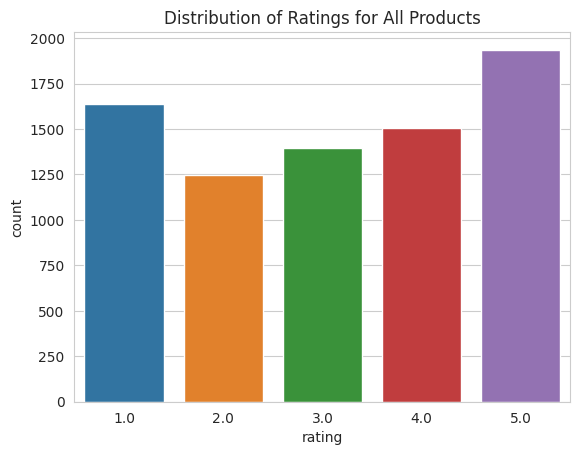

In [26]:
#Shape of the dataset, and breakdown of the classes

print(f"Input data has {len(df)} rows and {len(df.columns)} columns")
print(f"rating 1.0 = {len(df[df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(df[df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(df[df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(df[df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(df[df['rating']==5.0])} rows")

# Plotting the rate for each rating
plt.title('Distribution of Ratings for All Products')
sns.countplot(x='rating', data=df);

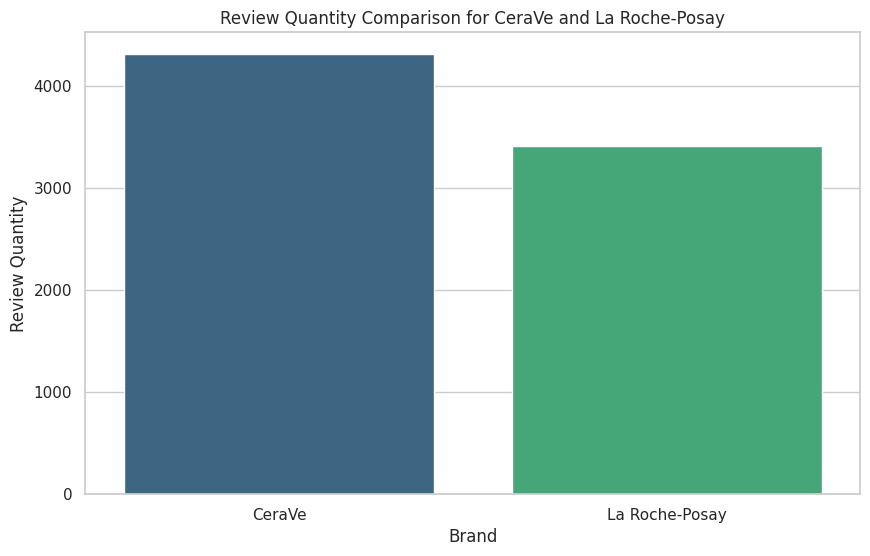

In [43]:
# Create a bar plot for review quantity comparison
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', data=df, palette='viridis')
plt.title('Review Quantity Comparison for CeraVe and La Roche-Posay')
plt.xlabel('Brand')
plt.ylabel('Review Quantity')
plt.show()

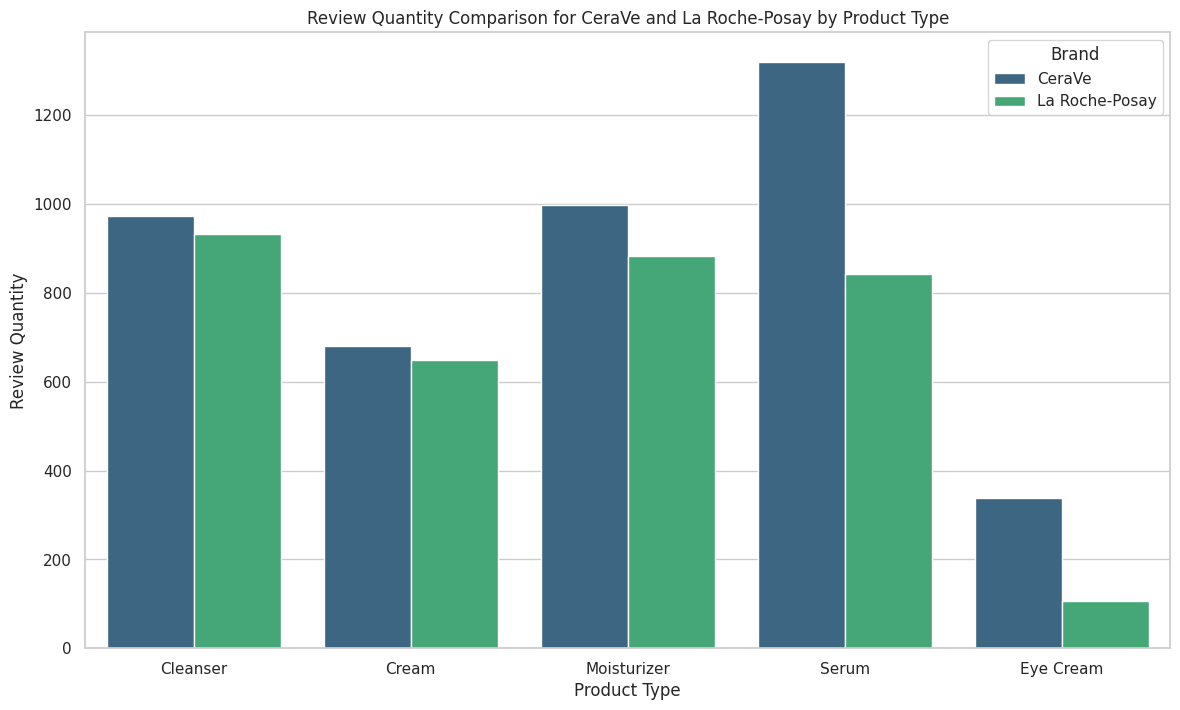

In [42]:
# Create a bar plot for review quantity comparison by product type
plt.figure(figsize=(14, 8))
sns.countplot(x='product_type', hue='brand', data=df, palette='viridis')
plt.title('Review Quantity Comparison for CeraVe and La Roche-Posay by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Review Quantity')
plt.legend(title='Brand')
plt.show()

## **EDA for Acne & Oily Skin Products**

Input data has 3122 rows and 16 columns
rating 1.0 = 648 rows
rating 2.0 = 504 rows
rating 3.0 = 542 rows
rating 4.0 = 639 rows
rating 5.0 = 789 rows


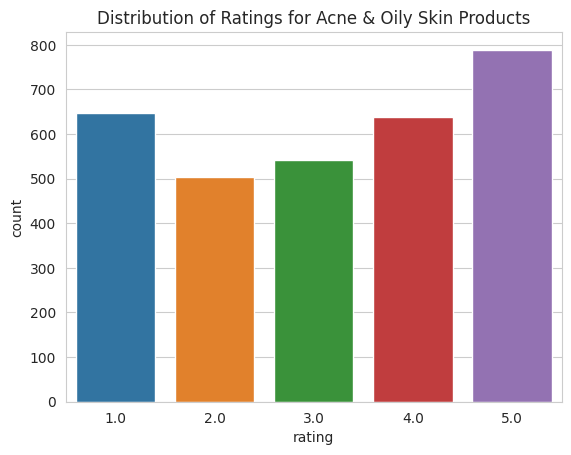

In [28]:
acne_oily_skin_df = df[df['skin_concern'] == 'acne and oily']

# Rating Distribution
print(f"Input data has {len(acne_oily_skin_df)} rows and {len(acne_oily_skin_df.columns)} columns")
print(f"rating 1.0 = {len(acne_oily_skin_df[acne_oily_skin_df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(acne_oily_skin_df[acne_oily_skin_df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(acne_oily_skin_df[acne_oily_skin_df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(acne_oily_skin_df[acne_oily_skin_df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(acne_oily_skin_df[acne_oily_skin_df['rating']==5.0])} rows")

# Plotting the rate for each rating
plt.title('Distribution of Ratings for Acne & Oily Skin Products')
sns.countplot(x='rating', data=acne_oily_skin_df);

###**Quantity of Reviews Targeting Acne and Oily Skin**

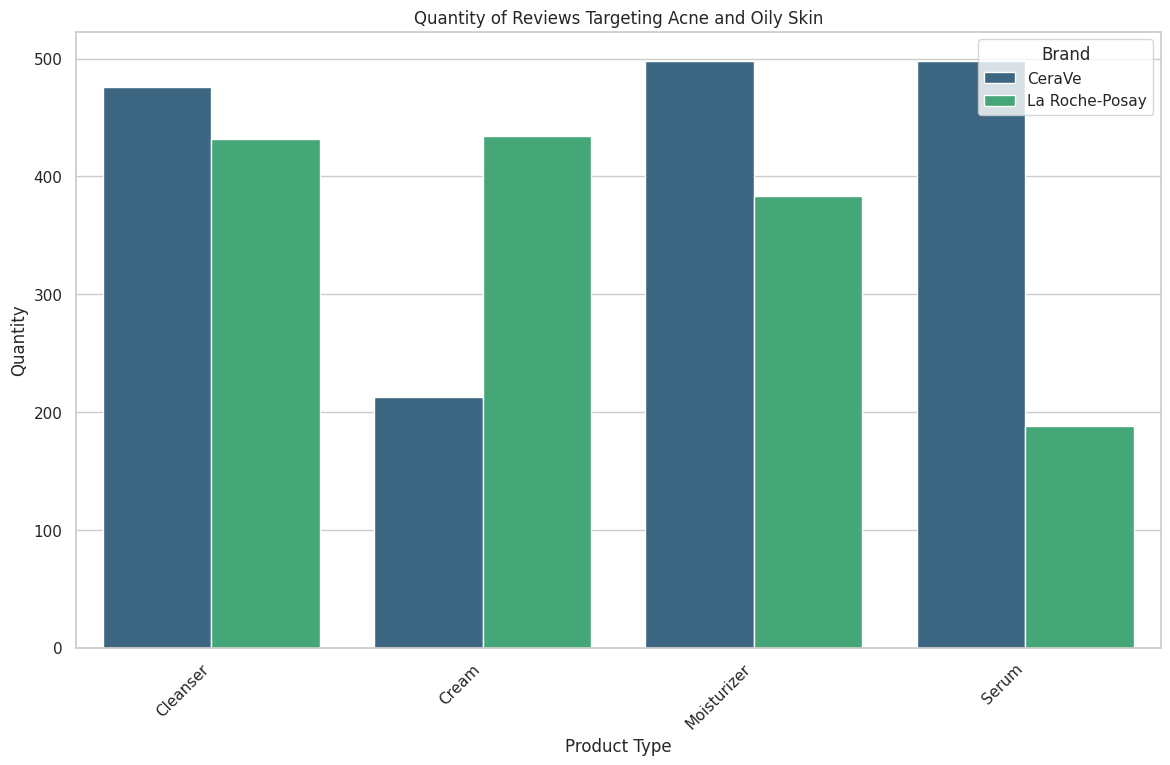

In [40]:
# Filter the data for products related to acne and oily skin
acne_oily_data = df[df['skin_concern'] == 'acne and oily']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type']

# Create a subset dataframe
subset_df = acne_oily_data[columns_to_compare]

# Count the number of occurrences for each brand and product type combination
product_counts = subset_df.groupby(['brand', 'product_type']).size().reset_index(name='quantity')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='quantity', hue='brand', data=product_counts, palette='viridis')
bar_plot.set_title("Quantity of Reviews Targeting Acne and Oily Skin")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Quantity")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()

###**Average Ratings for All Acne and Oily Skin Products**

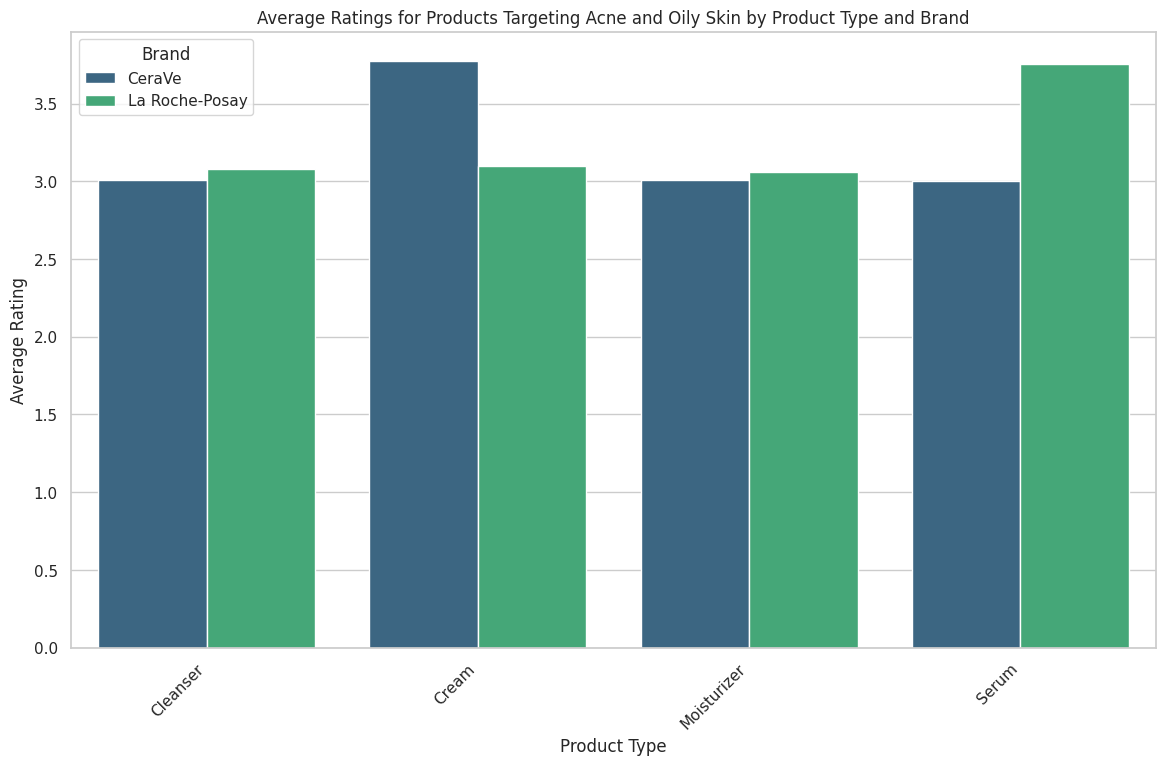

In [36]:
# Filter the data for products related to acne and oily skin
acne_oily_data = df[df['skin_concern'] == 'acne and oily']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type', 'rating']

# Create a subset dataframe
subset_df = acne_oily_data[columns_to_compare]

# Calculate the average rating for each brand and product type combination
average_ratings = subset_df.groupby(['brand', 'product_type'])['rating'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='rating', hue='brand', data=average_ratings, palette='viridis')
bar_plot.set_title("Average Ratings for Products Targeting Acne and Oily Skin by Product Type and Brand")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()


## **EDA for Anti-Aging Skin Products**

Input data has 1694 rows and 16 columns
rating 1.0 = 392 rows
rating 2.0 = 210 rows
rating 3.0 = 261 rows
rating 4.0 = 284 rows
rating 5.0 = 547 rows


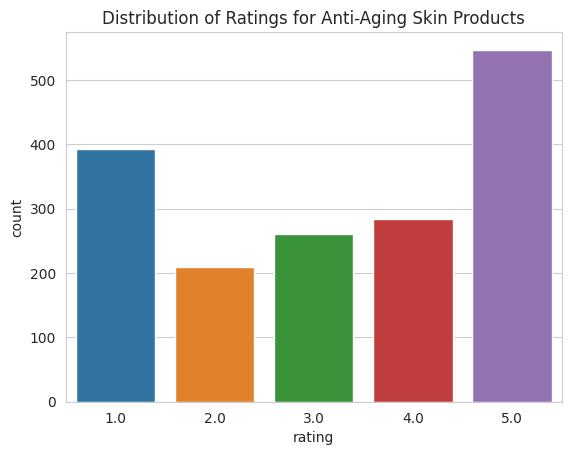

In [29]:
anti_aging_skin_df = df[df['skin_concern'] == 'anti-aging']

# Rating Distribution
print(f"Input data has {len(anti_aging_skin_df)} rows and {len(anti_aging_skin_df.columns)} columns")
print(f"rating 1.0 = {len(anti_aging_skin_df[anti_aging_skin_df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(anti_aging_skin_df[anti_aging_skin_df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(anti_aging_skin_df[anti_aging_skin_df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(anti_aging_skin_df[anti_aging_skin_df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(anti_aging_skin_df[anti_aging_skin_df['rating']==5.0])} rows")

# Plotting the rate for each rating
plt.title('Distribution of Ratings for Anti-Aging Skin Products')
sns.countplot(x='rating', data=anti_aging_skin_df);

###**Quantity of Reviews Targeting Anti-Aging Skin**

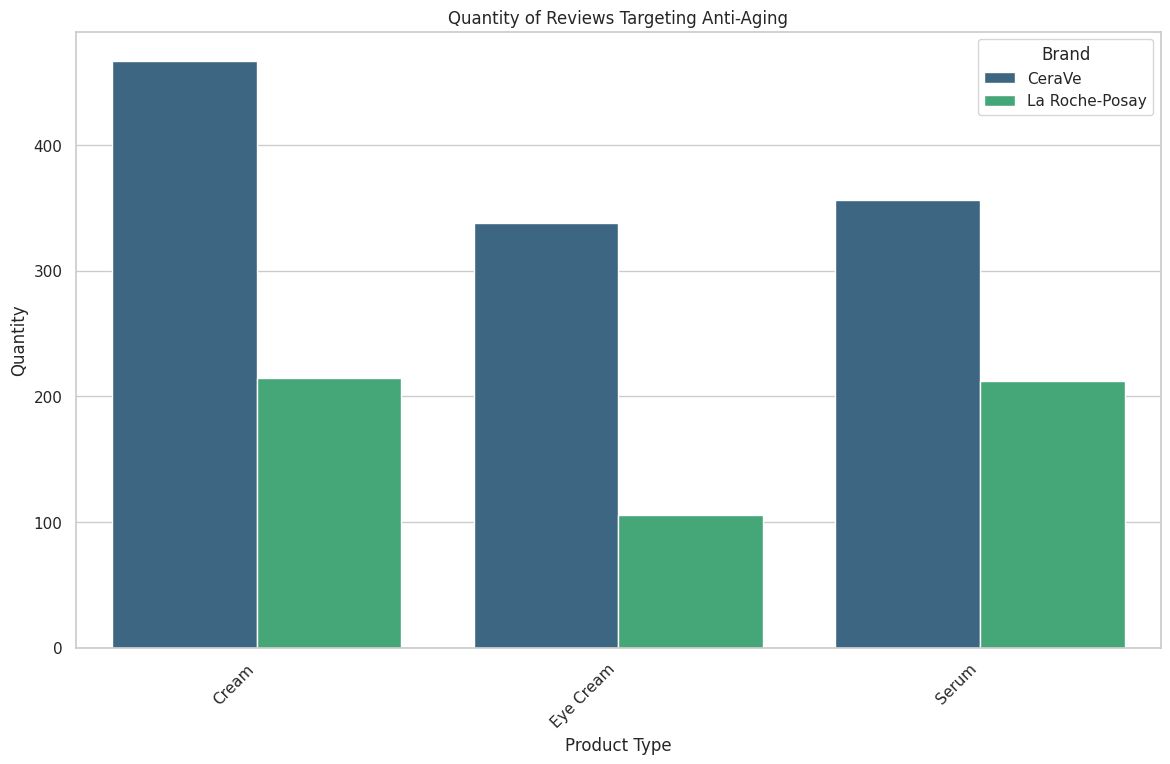

In [29]:
# Filter the data for products related to anti-aging
antiaging_data = df[df['skin_concern'] == 'anti-aging']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type']

# Create a subset dataframe
subset_df = antiaging_data[columns_to_compare]

# Count the number of occurrences for each brand and product type combination
product_counts = subset_df.groupby(['brand', 'product_type']).size().reset_index(name='quantity')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='quantity', hue='brand', data=product_counts, palette='viridis')
bar_plot.set_title("Quantity of Reviews Targeting Anti-Aging")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Quantity")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()

###**Average Ratings for All Anti-Aging Skin Products**

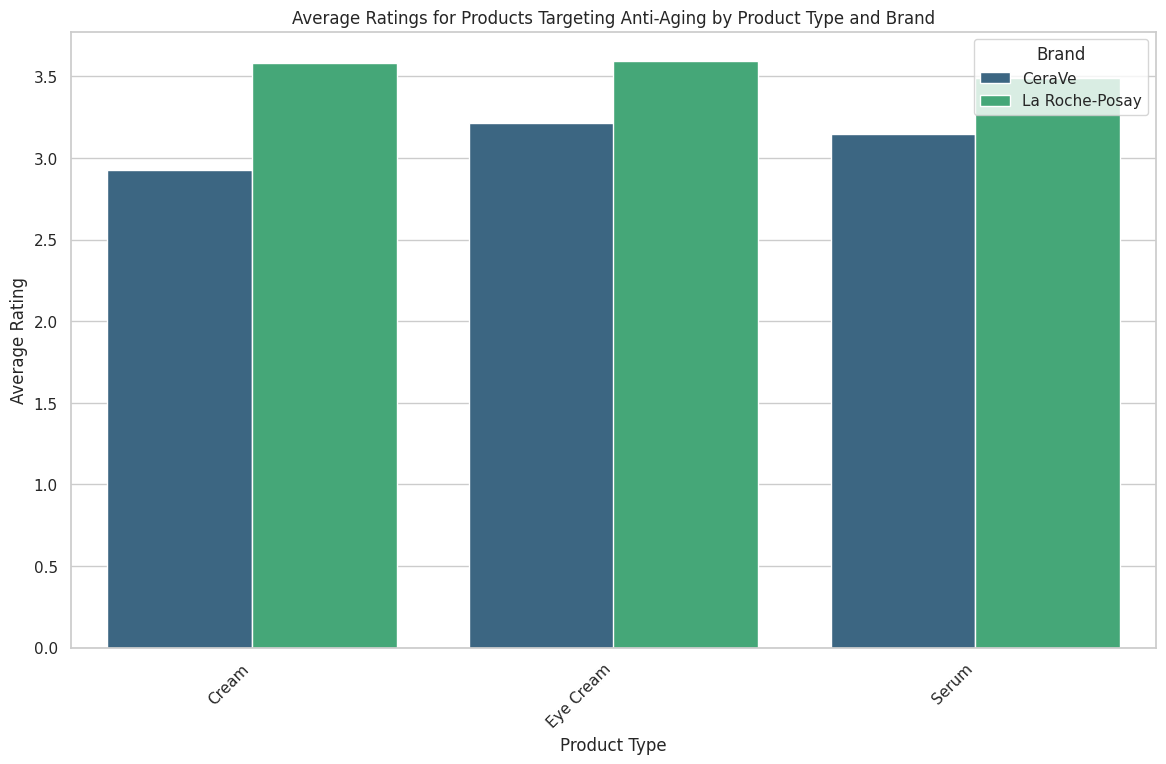

In [39]:
# Filter the data for products related to anti-aging
antiaging_data = df[df['skin_concern'] == 'anti-aging']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type', 'rating']

# Create a subset dataframe
subset_df = antiaging_data[columns_to_compare]

# Calculate the average rating for each brand and product type combination
average_ratings = subset_df.groupby(['brand', 'product_type'])['rating'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='rating', hue='brand', data=average_ratings, palette='viridis')
bar_plot.set_title("Average Ratings for Products Targeting Anti-Aging by Product Type and Brand")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()

## **EDA for Dry Skin Products**

Input data has 2905 rows and 16 columns
rating 1.0 = 595 rows
rating 2.0 = 534 rows
rating 3.0 = 593 rows
rating 4.0 = 583 rows
rating 5.0 = 600 rows


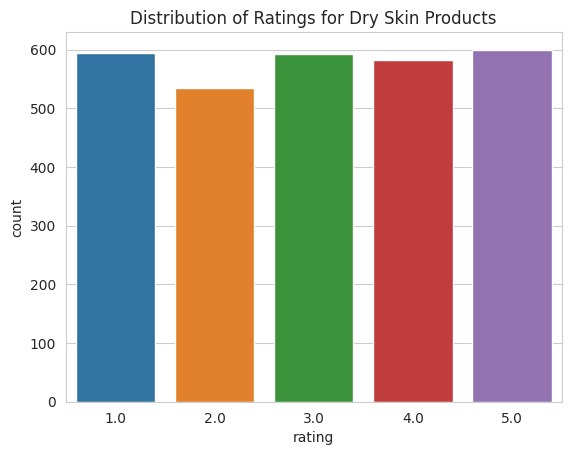

In [30]:
dry_skin_df = df[df['skin_concern'] == 'dry']

# Rating Distribution
print(f"Input data has {len(dry_skin_df)} rows and {len(dry_skin_df.columns)} columns")
print(f"rating 1.0 = {len(dry_skin_df[dry_skin_df['rating']==1.0])} rows")
print(f"rating 2.0 = {len(dry_skin_df[dry_skin_df['rating']==2.0])} rows")
print(f"rating 3.0 = {len(dry_skin_df[dry_skin_df['rating']==3.0])} rows")
print(f"rating 4.0 = {len(dry_skin_df[dry_skin_df['rating']==4.0])} rows")
print(f"rating 5.0 = {len(dry_skin_df[dry_skin_df['rating']==5.0])} rows")

# Plotting the rate for each rating
plt.title('Distribution of Ratings for Dry Skin Products')
sns.countplot(x='rating', data=dry_skin_df);

###**Quantity of Reviews Targeting Dry Skin**

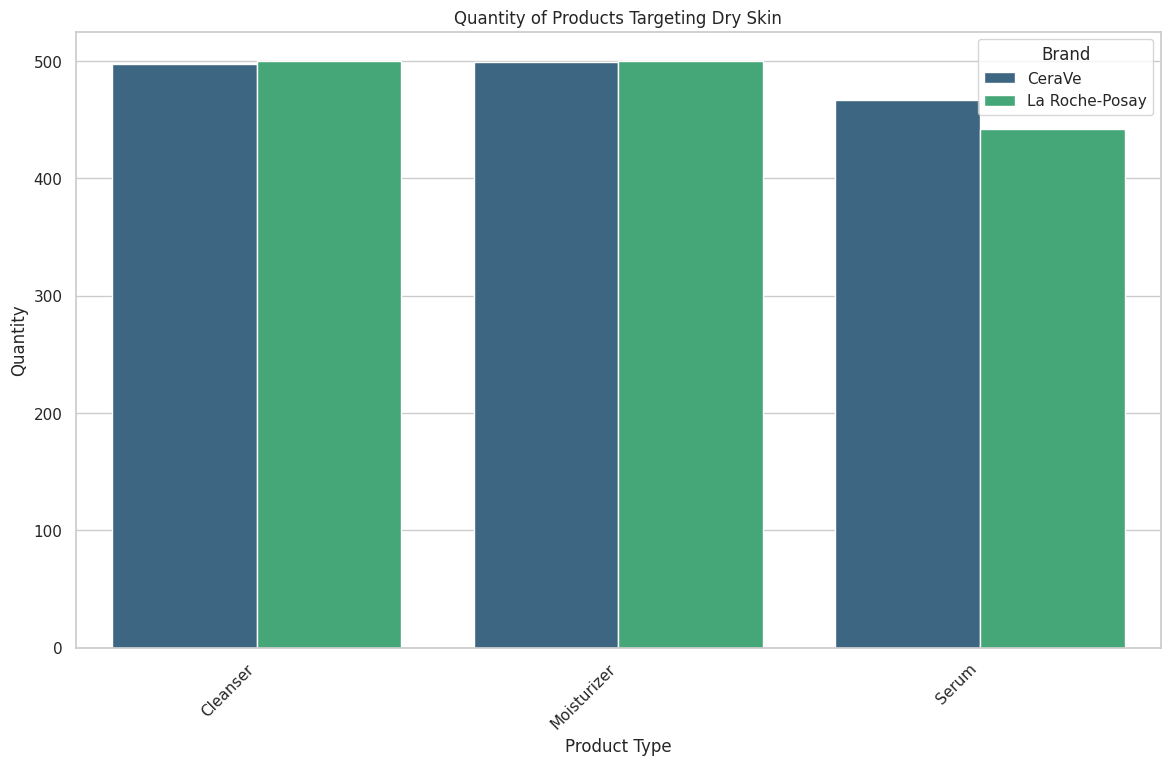

In [42]:
# Filter the data for products related to dry skin
dry_skin_data = df[df['skin_concern'] == 'dry']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type']

# Create a subset dataframe
subset_df = dry_skin_data[columns_to_compare]

# Count the number of occurrences for each brand and product type combination
product_counts = subset_df.groupby(['brand', 'product_type']).size().reset_index(name='quantity')

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='quantity', hue='brand', data=product_counts, palette='viridis')
bar_plot.set_title("Quantity of Reviews Targeting Dry Skin")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Quantity")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()


###**Average Ratings for All Dry Skin Products**

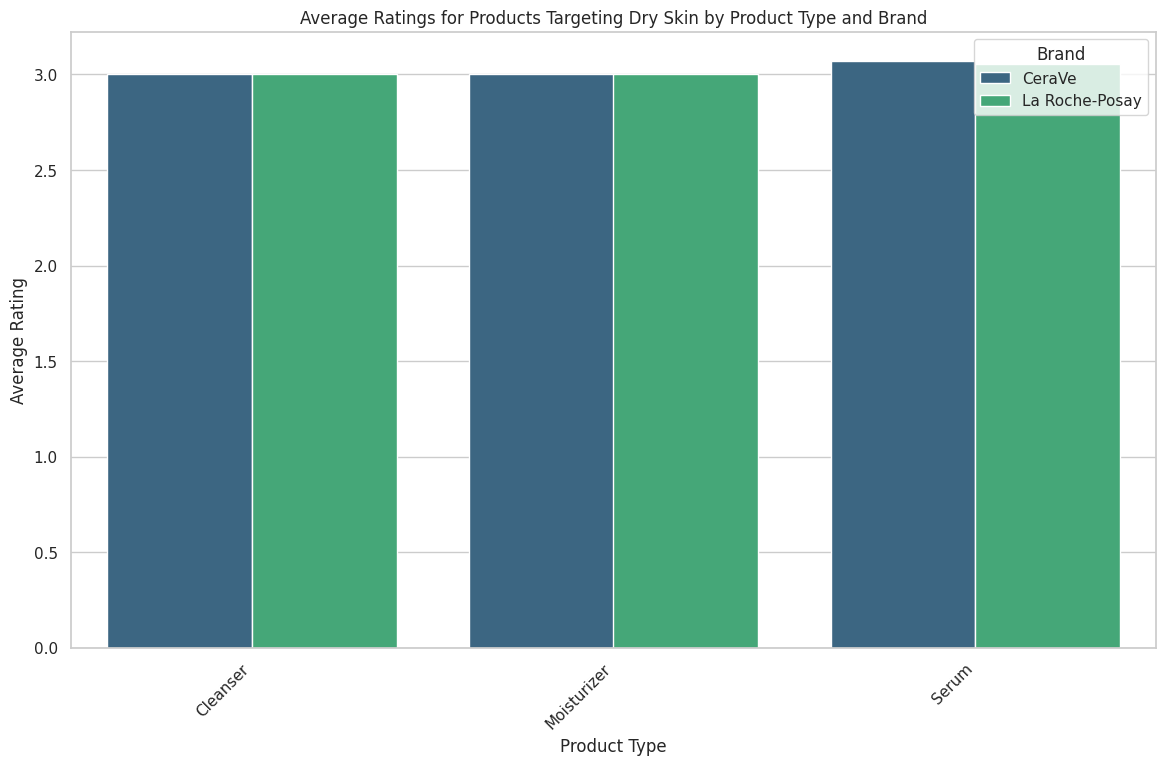

In [43]:
# Filter the data for products related to dry skin
dry_skin_data = df[df['skin_concern'] == 'dry']

# Select relevant columns for comparison
columns_to_compare = ['brand', 'product_type', 'rating']

# Create a subset dataframe
subset_df = dry_skin_data[columns_to_compare]

# Calculate the average rating for each brand and product type combination
average_ratings = subset_df.groupby(['brand', 'product_type'])['rating'].mean().reset_index()

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='product_type', y='rating', hue='brand', data=average_ratings, palette='viridis')
bar_plot.set_title("Average Ratings for Products Targeting Dry Skin by Product Type and Brand")
bar_plot.set_xlabel("Product Type")
bar_plot.set_ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Brand')
plt.show()

## **Sentiment Distribution Over Years**

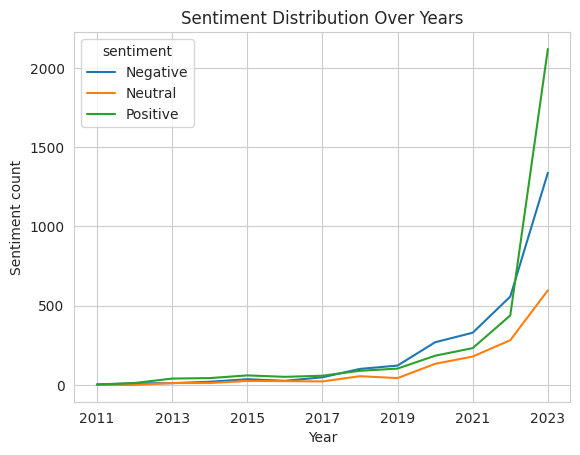

In [63]:
df.groupby(['year','sentiment'])['sentiment'].count().unstack().plot(legend=True)
plt.title('Sentiment Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

Insight:



## **Reviews Count Across Days of the Month**

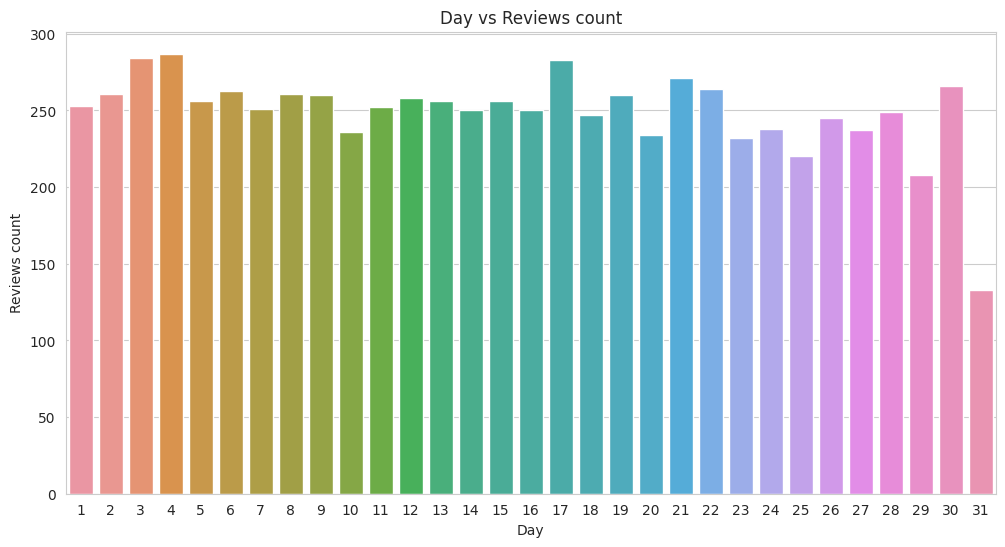

In [65]:
#Creating a dataframe
day=pd.DataFrame(df.groupby('day')['review'].count()).reset_index()
day['day']=day['day'].astype('int64')
day.sort_values(by=['day'])

#Plotting the graph
plt.figure(figsize=(12, 6))
sns.barplot(x="day", y="review", data=day)
plt.title('Day vs Reviews count')
plt.xlabel('Day')
plt.ylabel('Reviews count')
plt.show()

Insight:

The review counts are more or less uniformly distributed.There isn't much variance between the days. But there is a huge drop at the end of month.

##**Sentiment polarity distribution**

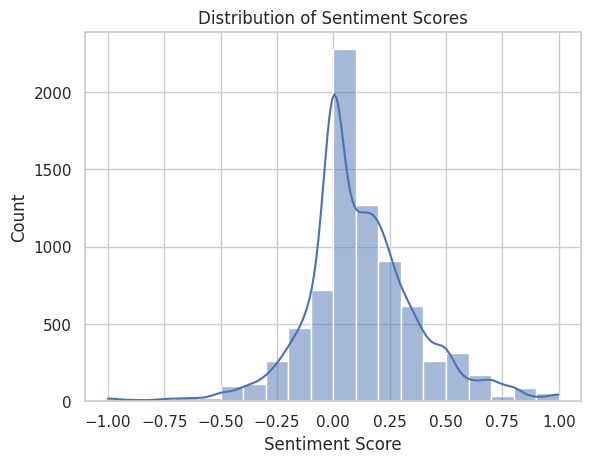

In [30]:
# Distribution of sentiment scores
sns.histplot(df['sentiment_tb'], bins=20, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.show()

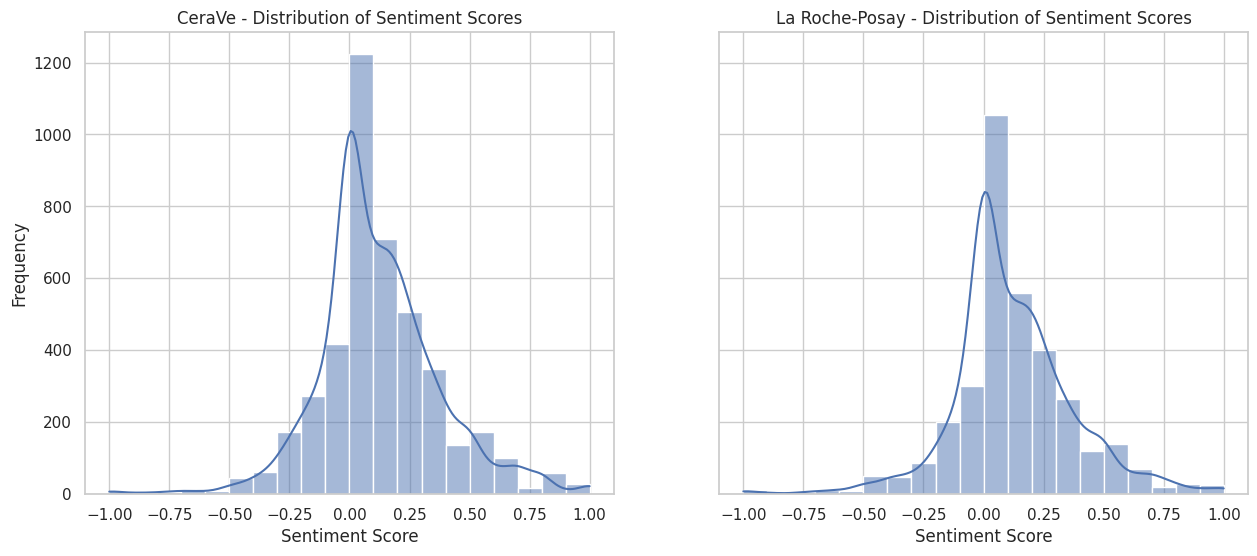

In [39]:
# Filter data for each brand
cerave_data = df[df['brand'] == 'CeraVe']
larocheposay_data = df[df['brand'] == 'La Roche-Posay']

# Create subplots for each brand
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Distribution of sentiment scores for CeraVe
sns.histplot(cerave_data['sentiment_tb'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('CeraVe - Distribution of Sentiment Scores')
axes[0].set_xlabel('Sentiment Score')
axes[0].set_ylabel('Frequency')

# Distribution of sentiment scores for La Roche-Posay
sns.histplot(larocheposay_data['sentiment_tb'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('La Roche-Posay - Distribution of Sentiment Scores')
axes[1].set_xlabel('Sentiment Score')
axes[1].set_ylabel('Frequency')

plt.show()


## **Sentiment Distributions**

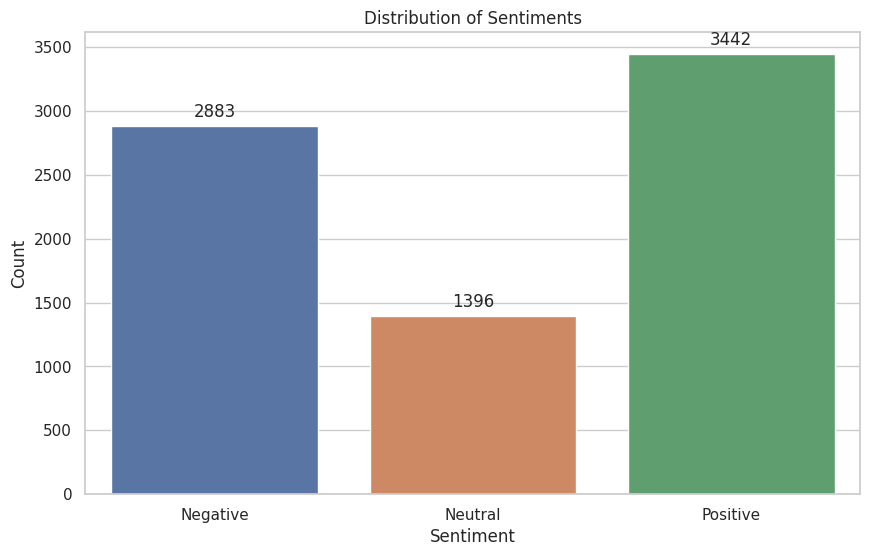

In [52]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', data=df)

# Title and labels
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display counts on top of the bars as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

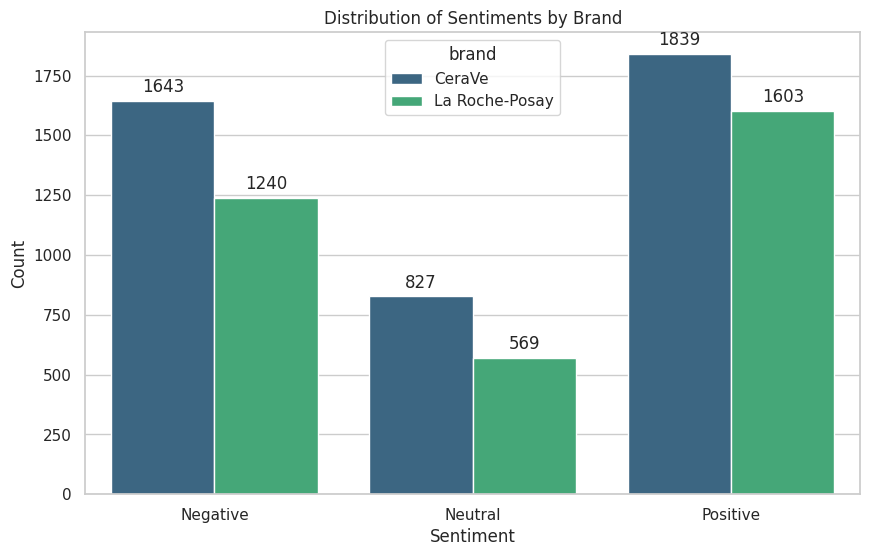

In [54]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='sentiment', hue='brand', data=df, palette='viridis')

# Title and labels
plt.title('Distribution of Sentiments by Brand')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Display counts on top of the bars as integers
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


#**Word Frequency Visualization using Word Cloud**

In [84]:
from wordcloud import WordCloud

In [91]:
df_negative = df[ (df['rating']==1.0) | (df['rating']==2.0) | (df['rating']==3.0)]
df_positive = df[ (df['rating']==4.0) | (df['rating']==5.0)]

# Converting to list
negative_list=df_negative['lemmatized_review'].tolist()
positive_list= df_positive['lemmatized_review'].tolist()

filtered_negative = ("").join(str(negative_list)) #convert the list into a string of spam
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list)) #convert the list into a string of ham
filtered_positive = filtered_positive.lower()

##**Word Cloud:** Positive Reviews

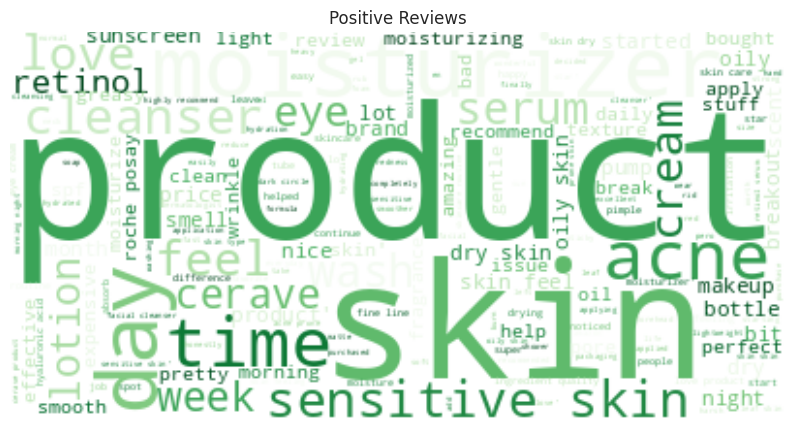

In [92]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Positive Reviews")
plt.show()

##**Word Cloud:** Negative Reviews

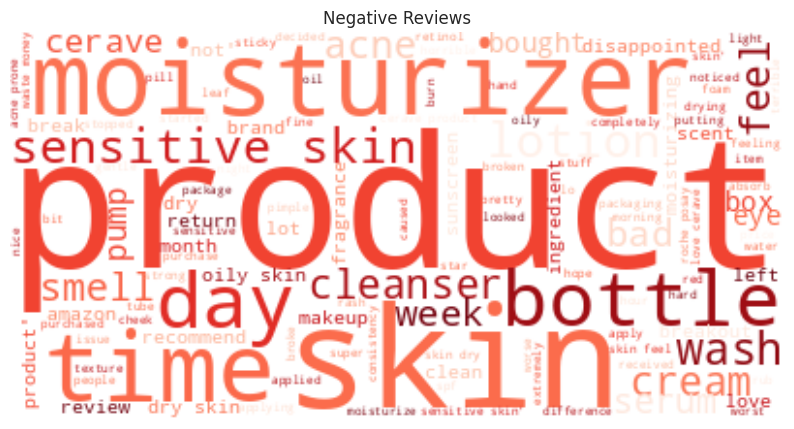

In [93]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews")
plt.show()

# **Brand: CeraVe**

##**Word Cloud:** CeraVe Positive Reviews

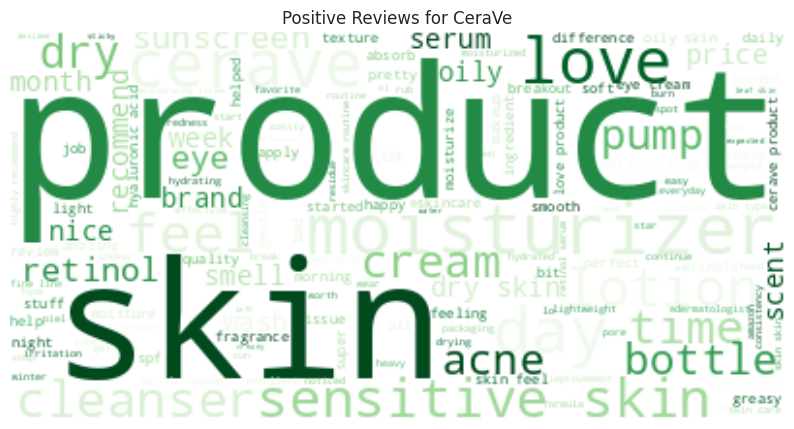

In [94]:
brand_name = 'CeraVe'

# Filter positive reviews for the specified brand
positive_reviews_cerave = df[(df['rating'] >= 4.0) & (df['brand'] == brand_name)]['lemmatized_review']

# Concatenate reviews into a single string
filtered_positive_cerave = ' '.join(positive_reviews_cerave.tolist()).lower()

# Create WordCloud for positive Cerave reviews
wordcloud_cerave = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Greens").generate(filtered_positive_cerave)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_cerave, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title(f"Positive Reviews for {brand_name}")
plt.show()

##**Word Cloud:** CeraVe Negative Reviews

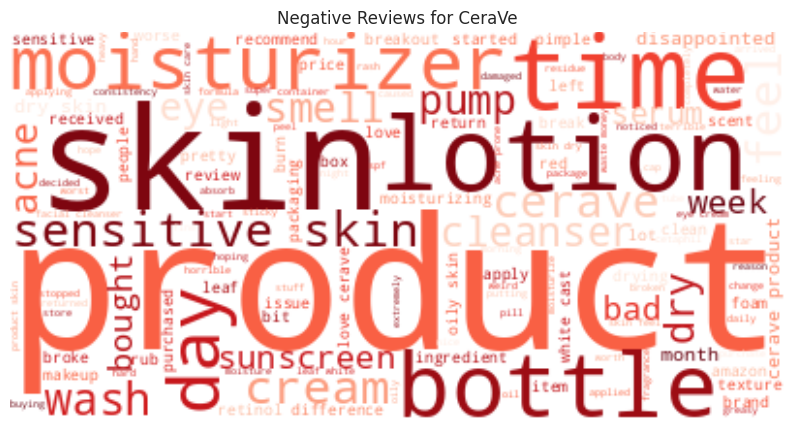

In [96]:
brand_name = 'CeraVe'

# Filter negative reviews for the specified brand
negative_reviews_cerave = df[(df['rating'] <= 3.0) & (df['brand'] == brand_name)]['lemmatized_review']

# Concatenate reviews into a single string
filtered_negative_cerave = ' '.join(negative_reviews_cerave.tolist()).lower()

# Create WordCloud for negative Cerave reviews
wordcloud_cerave_negative = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Reds").generate(filtered_negative_cerave)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_cerave_negative, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title(f"Negative Reviews for {brand_name}")
plt.show()

# **Brand: La Roche-Posay**

##**Word Cloud:** La Roche-Posay Positive Reviews

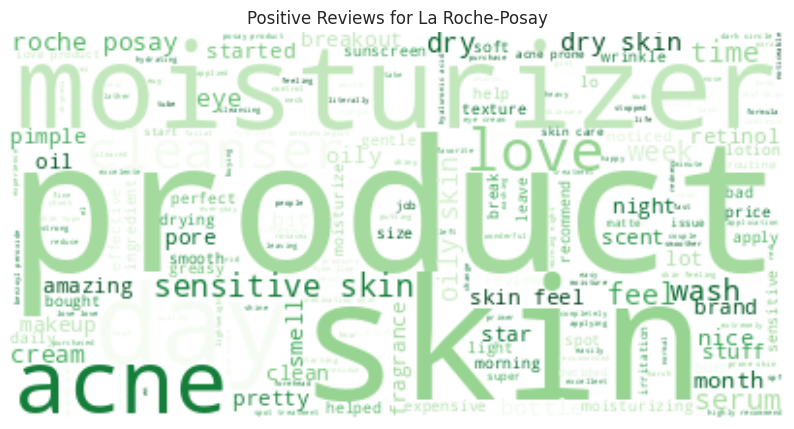

In [97]:
brand_name = 'La Roche-Posay'

# Filter positive reviews for the specified brand
positive_reviews_cerave = df[(df['rating'] >= 4.0) & (df['brand'] == brand_name)]['lemmatized_review']

# Concatenate reviews into a single string
filtered_positive_cerave = ' '.join(positive_reviews_cerave.tolist()).lower()

# Create WordCloud for positive Cerave reviews
wordcloud_cerave = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Greens").generate(filtered_positive_cerave)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_cerave, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title(f"Positive Reviews for {brand_name}")
plt.show()

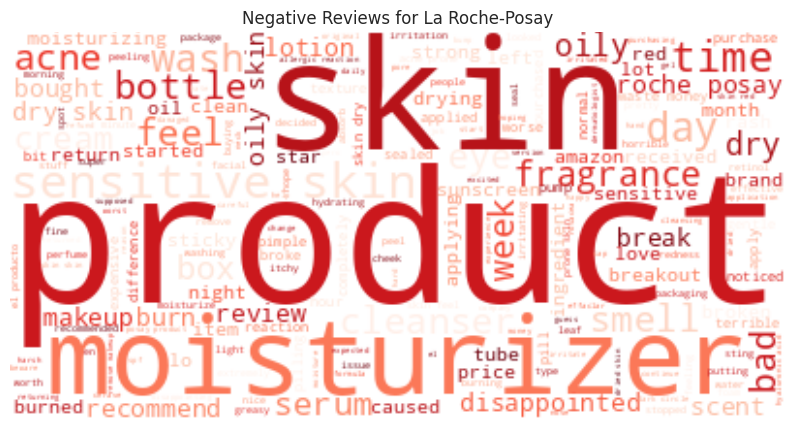

In [98]:
brand_name = 'La Roche-Posay'

# Filter negative reviews for the specified brand
negative_reviews_cerave = df[(df['rating'] <= 3.0) & (df['brand'] == brand_name)]['lemmatized_review']

# Concatenate reviews into a single string
filtered_negative_cerave = ' '.join(negative_reviews_cerave.tolist()).lower()

# Create WordCloud for negative Cerave reviews
wordcloud_cerave_negative = WordCloud(max_font_size=160, margin=0, background_color="white", colormap="Reds").generate(filtered_negative_cerave)

# Plot WordCloud
plt.figure(figsize=[10, 10])
plt.imshow(wordcloud_cerave_negative, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title(f"Negative Reviews for {brand_name}")
plt.show()

##**Positive Reviews for Each Brand by Product Types**

<Figure size 1200x800 with 0 Axes>

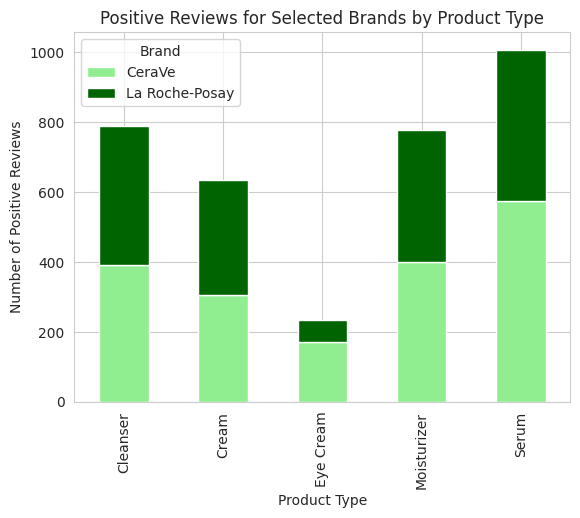

In [109]:
selected_brands = ['CeraVe', 'La Roche-Posay']

# Filter positive reviews for the selected brands
positive_reviews_selected_brands = df[(df['brand'].isin(selected_brands)) & (df['rating'] >= 4.0)]

# Group by product type and count positive reviews
positive_counts_selected_brands = positive_reviews_selected_brands.groupby(['product_type', 'brand']).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(12, 8))
ax = positive_counts_selected_brands.plot(kind='bar', stacked=True, color=['lightgreen', 'darkgreen'])

# Add labels and legend
plt.xlabel('Product Type')
plt.ylabel('Number of Positive Reviews')
plt.title('Positive Reviews for Selected Brands by Product Type')
plt.legend(title='Brand')

plt.show()


<Figure size 1600x1000 with 0 Axes>

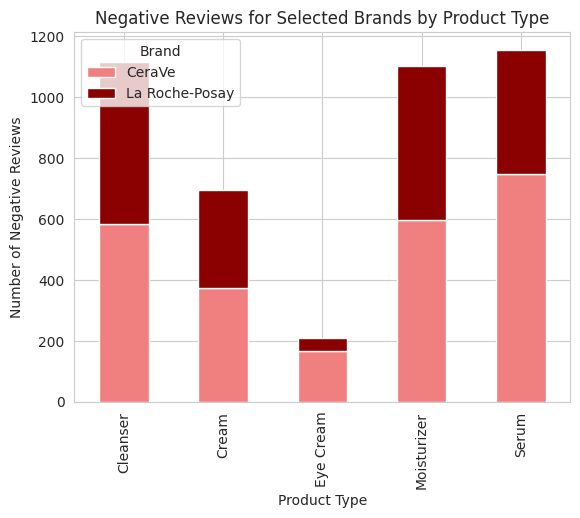

In [115]:
selected_brands = ['CeraVe', 'La Roche-Posay']

# Filter negative reviews for the selected brands
negative_reviews_selected_brands = df[(df['brand'].isin(selected_brands)) & (df['rating'] <= 3.0)]

# Group by product type and count negative reviews
negative_counts_selected_brands = negative_reviews_selected_brands.groupby(['product_type', 'brand']).size().unstack(fill_value=0)

# Plot bar chart
plt.figure(figsize=(16, 10))
ax = negative_counts_selected_brands.plot(kind='bar', stacked=True, color=['lightcoral', 'darkred'])

# Add labels and legend
plt.xlabel('Product Type')
plt.ylabel('Number of Negative Reviews')
plt.title('Negative Reviews for Selected Brands by Product Type')
plt.legend(title='Brand')

plt.show()

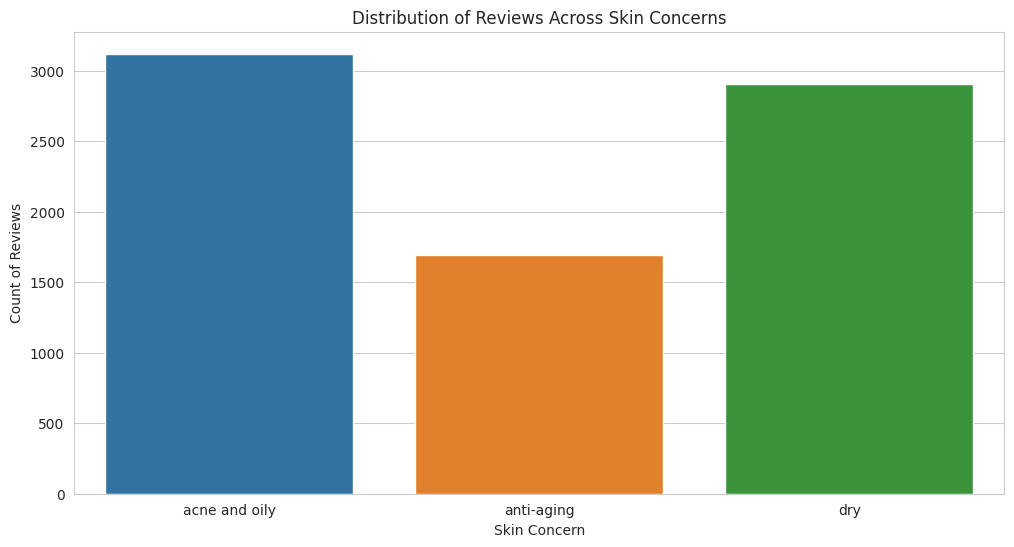

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='skin_concern', data=df)
plt.xlabel('Skin Concern')
plt.ylabel('Count of Reviews')
plt.title('Distribution of Reviews Across Skin Concerns')
plt.show()

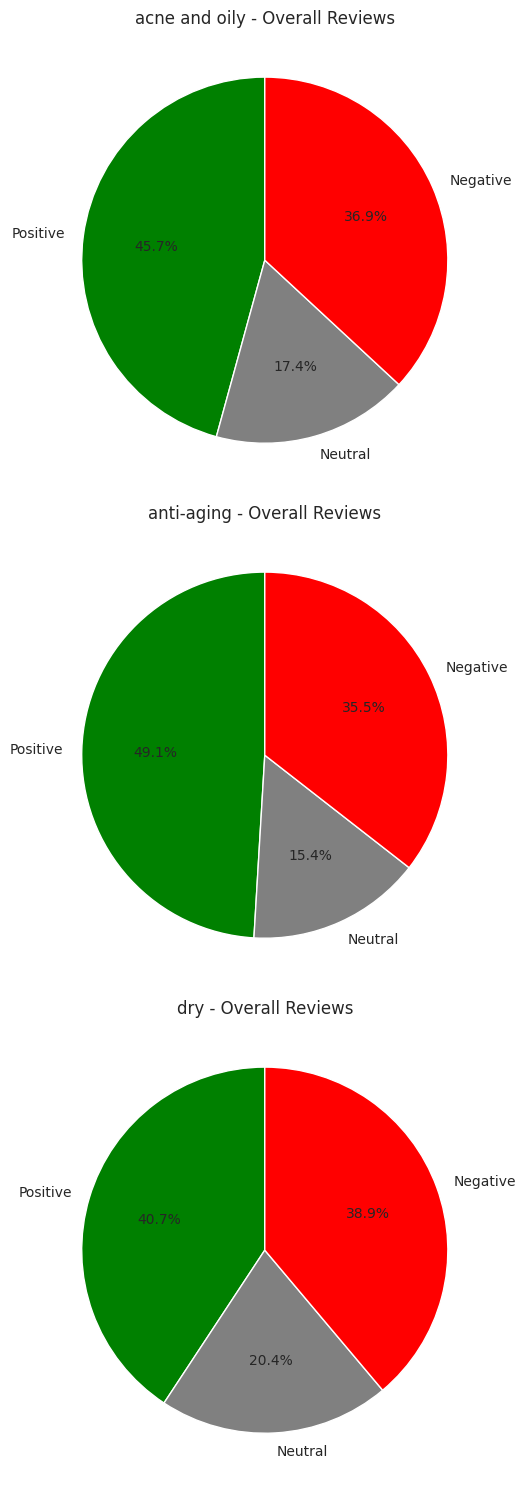

In [123]:
skin_concerns = df['skin_concern'].unique()

# Create subplots for each skin concern
fig, axes = plt.subplots(nrows=len(skin_concerns), ncols=1, figsize=(8, 5 * len(skin_concerns)))

# Iterate through each skin concern
for i, skin_concern in enumerate(skin_concerns):

    # Filter reviews for the current skin concern
    reviews_for_skin_concern = df[df['skin_concern'] == skin_concern]

    # Calculate percentages
    total_reviews = len(reviews_for_skin_concern)
    positive_percentage = len(reviews_for_skin_concern[reviews_for_skin_concern['sentiment'] == 'Positive']) / total_reviews * 100
    neutral_percentage = len(reviews_for_skin_concern[reviews_for_skin_concern['sentiment'] == 'Neutral']) / total_reviews * 100
    negative_percentage = len(reviews_for_skin_concern[reviews_for_skin_concern['sentiment'] == 'Negative']) / total_reviews * 100

    # Plot overall reviews pie chart
    axes[i].pie([positive_percentage, neutral_percentage, negative_percentage], labels=['Positive', 'Neutral', 'Negative'],
                autopct='%1.1f%%', startangle=90, colors=['green','gray','red'])
    axes[i].set_title(f'{skin_concern} - Overall Reviews')

# Adjust layout
plt.tight_layout()
plt.show()

#**N-gram analysis**

##**Monogram analysis**
Plotting the most frequent one word in reviews based on sentiments.

In [62]:
import plotly.graph_objs as go
from plotly import tools
from collections import defaultdict
from plotly.offline import iplot
import pandas as pd
from wordcloud import STOPWORDS


In [57]:
#Filtering data
review_pos = df[df["sentiment"]=='Positive'].dropna()
review_neu = df[df["sentiment"]=='Neutral'].dropna()
review_neg = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in review_pos["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in review_neu["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in review_neg["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [58]:
# custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]

    if n_gram == 1:
        ngrams = zip(*[token[i:] for i in range(n_gram)])
    elif n_gram == 2:
        ngrams = zip(*[token[i:] for i in range(n_gram)])

    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart for positive reviews with bigrams
freq_dict = defaultdict(int)
for sent in review_pos["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):  # Change n_gram to 2 for bigrams
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Get the bar chart for neutral reviews with bigrams
freq_dict = defaultdict(int)
for sent in review_neu["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):  # Change n_gram to 2 for bigrams
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

# Get the bar chart for negative reviews with bigrams
freq_dict = defaultdict(int)
for sent in review_neg["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):  # Change n_gram to 2 for bigrams
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Create subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent bigrams of positive reviews", "Frequent bigrams of neutral reviews",
                                          "Frequent bigrams of negative reviews"])

# Add traces to the subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

# Update layout
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='bigram-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [60]:
# custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Get the bar chart from negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04, horizontal_spacing=0.05,
                          subplot_titles=["Tri-gram plots of Positive reviews",
                                          "Tri-gram plots of Neutral reviews",
                                          "Tri-gram plots of Negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='word-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



## **Acne and Oily Skin**

In [61]:
# Filter reviews for the specific skin concern
reviews_for_acne_oily = df[df['skin_concern'] == 'acne and oily'].dropna()

# Get positive, neutral, and negative reviews
review_pos = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Positive']
review_neu = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Neutral']
review_neg = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Create subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])

# Add traces to the subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

# Update layout
fig['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                     title="Word Count Plots for Acne and Oily Skin Concern")
iplot(fig, filename='word-plots-acne-oily')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [62]:
# Filter data for "acne and oily" skin concern
reviews_acne_oily = df[df['skin_concern'] == 'acne and oily']

# Filter positive, neutral, and negative reviews
review_pos_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Positive'].dropna()
review_neu_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Neutral'].dropna()
review_neg_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Negative'].dropna()

# custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
trace_neu = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Get the bar chart from negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Creating subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent bigrams of positive reviews",
                                          "Frequent bigrams of neutral reviews",
                                          "Frequent bigrams of negative reviews"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neu, 2, 1)
fig.append_trace(trace_neg, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='bigram-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [63]:
# Filter data for "acne and oily" skin concern
reviews_acne_oily = df[df['skin_concern'] == 'acne and oily']

# Filter positive, neutral, and negative reviews
review_pos_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Positive'].dropna()
review_neu_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Neutral'].dropna()
review_neg_acne_oily = reviews_acne_oily[reviews_acne_oily["sentiment"] == 'Negative'].dropna()

# custom function for ngram generation
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
trace_neu = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Get the bar chart from negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg_acne_oily["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Creating subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent trigrams of positive reviews",
                                          "Frequent trigrams of neutral reviews",
                                          "Frequent trigrams of negative reviews"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neu, 2, 1)
fig.append_trace(trace_neg, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig, filename='trigram-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



##**Anti-Aging Skin**

In [64]:
# Filter reviews for the specific skin concern
reviews_for_acne_oily = df[df['skin_concern'] == 'anti-aging'].dropna()

# Get positive, neutral, and negative reviews
review_pos = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Positive']
review_neu = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Neutral']
review_neg = reviews_for_acne_oily[reviews_for_acne_oily["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict = defaultdict(int)
for sent in review_pos["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict = defaultdict(int)
for sent in review_neu["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict = defaultdict(int)
for sent in review_neg["lemmatized_review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(25), 'red')

# Create subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])

# Add traces to the subplot
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)

# Update layout
fig['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                     title="Word Count Plots for Anti-Aging Skin Concern")
iplot(fig, filename='word-plots-anti-aging')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [65]:
# Filter data for "anti-aging" skin concern
reviews_antiaging = df[df['skin_concern'] == 'anti-aging']

# Filter positive, neutral, and negative reviews
review_pos_antiaging = reviews_antiaging[reviews_antiaging["sentiment"] == 'Positive'].dropna()
review_neu_antiaging = reviews_antiaging[reviews_antiaging["sentiment"] == 'Neutral'].dropna()
review_neg_antiaging = reviews_antiaging[reviews_antiaging["sentiment"] == 'Negative'].dropna()

# custom function for ngram generation
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews
freq_dict_pos = defaultdict(int)
for sent in review_pos_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_pos[word] += 1
fd_sorted_pos = pd.DataFrame(sorted(freq_dict_pos.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos.columns = ["word", "wordcount"]
trace_pos = horizontal_bar_chart(fd_sorted_pos.head(25), 'green')

# Get the bar chart from neutral reviews
freq_dict_neu = defaultdict(int)
for sent in review_neu_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_neu[word] += 1
fd_sorted_neu = pd.DataFrame(sorted(freq_dict_neu.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu.columns = ["word", "wordcount"]
trace_neu = horizontal_bar_chart(fd_sorted_neu.head(25), 'grey')

# Get the bar chart from negative reviews
freq_dict_neg = defaultdict(int)
for sent in review_neg_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 2):
        freq_dict_neg[word] += 1
fd_sorted_neg = pd.DataFrame(sorted(freq_dict_neg.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg.columns = ["word", "wordcount"]
trace_neg = horizontal_bar_chart(fd_sorted_neg.head(25), 'red')

# Creating subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                          subplot_titles=["Frequent bigrams of positive reviews",
                                          "Frequent bigrams of neutral reviews",
                                          "Frequent bigrams of negative reviews"])
fig.append_trace(trace_pos, 1, 1)
fig.append_trace(trace_neu, 2, 1)
fig.append_trace(trace_neg, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
iplot(fig, filename='bigram-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [67]:
# Get the bar chart from positive reviews (trigrams)
freq_dict_pos_trigram = defaultdict(int)
for sent in review_pos_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_pos_trigram[word] += 1
fd_sorted_pos_trigram = pd.DataFrame(sorted(freq_dict_pos_trigram.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_trigram.columns = ["word", "wordcount"]
trace_pos_trigram = horizontal_bar_chart(fd_sorted_pos_trigram.head(25), 'green')

# Get the bar chart from neutral reviews (trigrams)
freq_dict_neu_trigram = defaultdict(int)
for sent in review_neu_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neu_trigram[word] += 1
fd_sorted_neu_trigram = pd.DataFrame(sorted(freq_dict_neu_trigram.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_trigram.columns = ["word", "wordcount"]
trace_neu_trigram = horizontal_bar_chart(fd_sorted_neu_trigram.head(25), 'grey')

# Get the bar chart from negative reviews (trigrams)
freq_dict_neg_trigram = defaultdict(int)
for sent in review_neg_antiaging["lemmatized_review"]:
    for word in generate_ngrams(sent, 3):
        freq_dict_neg_trigram[word] += 1
fd_sorted_neg_trigram = pd.DataFrame(sorted(freq_dict_neg_trigram.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_trigram.columns = ["word", "wordcount"]
trace_neg_trigram = horizontal_bar_chart(fd_sorted_neg_trigram.head(25), 'red')

# Creating subplots for trigrams
fig_trigram = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                                 subplot_titles=["Frequent trigrams of positive reviews",
                                                 "Frequent trigrams of neutral reviews",
                                                 "Frequent trigrams of negative reviews"])
fig_trigram.append_trace(trace_pos_trigram, 1, 1)
fig_trigram.append_trace(trace_neu_trigram, 2, 1)
fig_trigram.append_trace(trace_neg_trigram, 3, 1)
fig_trigram['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
iplot(fig_trigram, filename='trigram-plots')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



##**Dry Skin**

In [69]:
# Filter reviews for the specific skin concern
reviews_for_dry_skin = df[df['skin_concern'] == 'dry'].dropna()

# Get positive, neutral, and negative reviews
review_pos_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Positive']
review_neu_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Neutral']
review_neg_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict_pos_dry = defaultdict(int)
for sent in review_pos_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_pos_dry[word] += 1
fd_sorted_pos_dry = pd.DataFrame(sorted(freq_dict_pos_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_dry.columns = ["word", "wordcount"]
trace0_dry = horizontal_bar_chart(fd_sorted_pos_dry.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_dry = defaultdict(int)
for sent in review_neu_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neu_dry[word] += 1
fd_sorted_neu_dry = pd.DataFrame(sorted(freq_dict_neu_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_dry.columns = ["word", "wordcount"]
trace1_dry = horizontal_bar_chart(fd_sorted_neu_dry.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_dry = defaultdict(int)
for sent in review_neg_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neg_dry[word] += 1
fd_sorted_neg_dry = pd.DataFrame(sorted(freq_dict_neg_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_dry.columns = ["word", "wordcount"]
trace2_dry = horizontal_bar_chart(fd_sorted_neg_dry.head(25), 'red')

# Create subplots
fig_dry = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent monograms of positive reviews",
                                              "Frequent monograms of neutral reviews",
                                              "Frequent monograms of negative reviews"])

# Add traces to the subplot
fig_dry.append_trace(trace0_dry, 1, 1)
fig_dry.append_trace(trace1_dry, 2, 1)
fig_dry.append_trace(trace2_dry, 3, 1)

# Update layout
fig_dry['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Monogram Count Plots for Dry Skin Concern")
iplot(fig_dry, filename='monogram-plots-dry-skin')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [70]:
# Filter reviews for the specific skin concern
reviews_for_dry_skin = df[df['skin_concern'] == 'dry'].dropna()

# Get positive, neutral, and negative reviews
review_pos_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Positive']
review_neu_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Neutral']
review_neg_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict_pos_dry = defaultdict(int)
for sent in review_pos_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_pos_dry[word] += 1
fd_sorted_pos_dry = pd.DataFrame(sorted(freq_dict_pos_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_dry.columns = ["word", "wordcount"]
trace0_dry = horizontal_bar_chart(fd_sorted_pos_dry.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_dry = defaultdict(int)
for sent in review_neu_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_neu_dry[word] += 1
fd_sorted_neu_dry = pd.DataFrame(sorted(freq_dict_neu_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_dry.columns = ["word", "wordcount"]
trace1_dry = horizontal_bar_chart(fd_sorted_neu_dry.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_dry = defaultdict(int)
for sent in review_neg_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=2):
        freq_dict_neg_dry[word] += 1
fd_sorted_neg_dry = pd.DataFrame(sorted(freq_dict_neg_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_dry.columns = ["word", "wordcount"]
trace2_dry = horizontal_bar_chart(fd_sorted_neg_dry.head(25), 'red')

# Create subplots
fig_dry = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent bigrams of positive reviews",
                                              "Frequent bigrams of neutral reviews",
                                              "Frequent bigrams of negative reviews"])

# Add traces to the subplot
fig_dry.append_trace(trace0_dry, 1, 1)
fig_dry.append_trace(trace1_dry, 2, 1)
fig_dry.append_trace(trace2_dry, 3, 1)

# Update layout
fig_dry['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Bigram Count Plots for Dry Skin Concern")
iplot(fig_dry, filename='bigram-plots-dry-skin')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [71]:
# Filter reviews for the specific skin concern
reviews_for_dry_skin = df[df['skin_concern'] == 'dry'].dropna()

# Get positive, neutral, and negative reviews
review_pos_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Positive']
review_neu_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Neutral']
review_neg_dry = reviews_for_dry_skin[reviews_for_dry_skin["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict_pos_dry = defaultdict(int)
for sent in review_pos_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_pos_dry[word] += 1
fd_sorted_pos_dry = pd.DataFrame(sorted(freq_dict_pos_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_dry.columns = ["word", "wordcount"]
trace0_dry = horizontal_bar_chart(fd_sorted_pos_dry.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_dry = defaultdict(int)
for sent in review_neu_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neu_dry[word] += 1
fd_sorted_neu_dry = pd.DataFrame(sorted(freq_dict_neu_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_dry.columns = ["word", "wordcount"]
trace1_dry = horizontal_bar_chart(fd_sorted_neu_dry.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_dry = defaultdict(int)
for sent in review_neg_dry["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neg_dry[word] += 1
fd_sorted_neg_dry = pd.DataFrame(sorted(freq_dict_neg_dry.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_dry.columns = ["word", "wordcount"]
trace2_dry = horizontal_bar_chart(fd_sorted_neg_dry.head(25), 'red')

# Create subplots
fig_dry = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent trigrams of positive reviews",
                                              "Frequent trigrams of neutral reviews",
                                              "Frequent trigrams of negative reviews"])

# Add traces to the subplot
fig_dry.append_trace(trace0_dry, 1, 1)
fig_dry.append_trace(trace1_dry, 2, 1)
fig_dry.append_trace(trace2_dry, 3, 1)

# Update layout
fig_dry['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Trigram Count Plots for Dry Skin Concern")
iplot(fig_dry, filename='trigram-plots-dry-skin')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [63]:
# Filter positive reviews for CeraVe and La Roche-Posay
positive_reviews_cerave = df[(df['brand'] == 'CeraVe') & (df['rating'] >= 4.0)]
positive_reviews_lrp = df[(df['brand'] == 'La Roche-Posay') & (df['rating'] >= 4.0)]

# custom function for trigram generation
def generate_trigrams(text):
    token = [token for token in text.lower().split(" ") if token != ""]
    trigrams = zip(*[token[i:] for i in range(3)])
    return [" ".join(trigram) for trigram in trigrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from positive reviews for CeraVe
freq_dict_pos_cerave = defaultdict(int)
for sent in positive_reviews_cerave["lemmatized_review"]:
    for word in generate_trigrams(sent):
        freq_dict_pos_cerave[word] += 1
fd_sorted_pos_cerave = pd.DataFrame(sorted(freq_dict_pos_cerave.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_cerave.columns = ["word", "wordcount"]
trace_pos_cerave = horizontal_bar_chart(fd_sorted_pos_cerave.head(25), 'green')

# Get the bar chart from positive reviews for La Roche-Posay
freq_dict_pos_lrp = defaultdict(int)
for sent in positive_reviews_lrp["lemmatized_review"]:
    for word in generate_trigrams(sent):
        freq_dict_pos_lrp[word] += 1
fd_sorted_pos_lrp = pd.DataFrame(sorted(freq_dict_pos_lrp.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_lrp.columns = ["word", "wordcount"]
trace_pos_lrp = horizontal_bar_chart(fd_sorted_pos_lrp.head(25), 'blue')

# Creating subplots
fig_pos_trigram = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,
                                      subplot_titles=["Frequent trigrams of positive reviews for CeraVe",
                                                      "Frequent trigrams of positive reviews for La Roche-Posay"])

# Add traces to the subplot
fig_pos_trigram.append_trace(trace_pos_cerave, 1, 1)
fig_pos_trigram.append_trace(trace_pos_lrp, 2, 1)

# Update layout
fig_pos_trigram['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                                 title="Trigram Count Plots for Positive Reviews")
iplot(fig_pos_trigram, filename='trigram-plots-positive')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [79]:
# Filter negative reviews for CeraVe and La Roche-Posay
negative_reviews_cerave = df[(df['brand'] == 'CeraVe') & (df['sentiment'] == 'Negative')]
negative_reviews_lrp = df[(df['brand'] == 'La Roche-Posay') & (df['sentiment'] == 'Negative')]

# custom function for trigram generation
def generate_trigrams(text):
    token = [token for token in text.lower().split(" ") if token != ""]
    trigrams = zip(*[token[i:] for i in range(3)])
    return [" ".join(trigram) for trigram in trigrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart from negative reviews for CeraVe
freq_dict_neg_cerave = defaultdict(int)
for sent in negative_reviews_cerave["lemmatized_review"]:
    for word in generate_trigrams(sent):
        freq_dict_neg_cerave[word] += 1
fd_sorted_neg_cerave = pd.DataFrame(sorted(freq_dict_neg_cerave.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_cerave.columns = ["word", "wordcount"]
trace_neg_cerave = horizontal_bar_chart(fd_sorted_neg_cerave.head(25), 'red')

# Get the bar chart from negative reviews for La Roche-Posay
freq_dict_neg_lrp = defaultdict(int)
for sent in negative_reviews_lrp["lemmatized_review"]:
    for word in generate_trigrams(sent):
        freq_dict_neg_lrp[word] += 1
fd_sorted_neg_lrp = pd.DataFrame(sorted(freq_dict_neg_lrp.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_lrp.columns = ["word", "wordcount"]
trace_neg_lrp = horizontal_bar_chart(fd_sorted_neg_lrp.head(25), 'purple')

# Creating subplots
fig_neg_trigram = tools.make_subplots(rows=2, cols=1, vertical_spacing=0.04,
                                      subplot_titles=["Frequent trigrams of negative reviews for CeraVe",
                                                      "Frequent trigrams of negative reviews for La Roche-Posay"])

# Add traces to the subplot
fig_neg_trigram.append_trace(trace_neg_cerave, 1, 1)
fig_neg_trigram.append_trace(trace_neg_lrp, 2, 1)

# Update layout
fig_neg_trigram['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                                 title="Trigram Count Plots for Negative Reviews")
iplot(fig_neg_trigram, filename='trigram-plots-negative')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



##**N-gram analysis for CeraVe**

###**Monogram analysis**

In [86]:
# Filter reviews for the specific skin concern
reviews_for_CeraVe_skin = df[df['brand'] == 'CeraVe'].dropna()

# Get positive, neutral, and negative reviews
review_pos_CeraVe = reviews_for_CeraVe_skin[reviews_for_CeraVe_skin["sentiment"] == 'Positive']
review_neu_CeraVe = reviews_for_CeraVe_skin[reviews_for_CeraVe_skin["sentiment"] == 'Neutral']
review_neg_CeraVe = reviews_for_CeraVe_skin[reviews_for_CeraVe_skin["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict_pos_CeraVe = defaultdict(int)
for sent in review_pos_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_pos_CeraVe[word] += 1
fd_sorted_pos_CeraVe = pd.DataFrame(sorted(freq_dict_pos_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_CeraVe.columns = ["word", "wordcount"]
trace0_CeraVe = horizontal_bar_chart(fd_sorted_pos_CeraVe.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_CeraVe = defaultdict(int)
for sent in review_neu_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neu_CeraVe[word] += 1
fd_sorted_neu_CeraVe = pd.DataFrame(sorted(freq_dict_neu_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_CeraVe.columns = ["word", "wordcount"]
trace1_CeraVe = horizontal_bar_chart(fd_sorted_neu_CeraVe.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_CeraVe = defaultdict(int)
for sent in review_neg_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neg_CeraVe[word] += 1
fd_sorted_neg_CeraVe = pd.DataFrame(sorted(freq_dict_neg_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_CeraVe.columns = ["word", "wordcount"]
trace2_CeraVe = horizontal_bar_chart(fd_sorted_neg_CeraVe.head(25), 'red')

# Create subplots
fig_CeraVe = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent monograms of positive reviews",
                                              "Frequent monograms of neutral reviews",
                                              "Frequent monograms of negative reviews"])

# Add traces to the subplot
fig_CeraVe.append_trace(trace0_CeraVe, 1, 1)
fig_CeraVe.append_trace(trace1_CeraVe, 2, 1)
fig_CeraVe.append_trace(trace2_CeraVe, 3, 1)

# Update layout
fig_CeraVe['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Monogram Count Plots for CeraVe Skin Concern")
iplot(fig_CeraVe, filename='monogram-plots-CeraVe-skin')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



###**Bigram analysis**

###**Trigram analysis**

In [82]:
# Filter reviews for the specific brand
reviews_for_CeraVe = df[df['brand'] == 'CeraVe'].dropna()

# Get positive, neutral, and negative reviews
review_pos_CeraVe = reviews_for_CeraVe[reviews_for_CeraVe["sentiment"] == 'Positive']
review_neu_CeraVe = reviews_for_CeraVe[reviews_for_CeraVe["sentiment"] == 'Neutral']
review_neg_CeraVe = reviews_for_CeraVe[reviews_for_CeraVe["sentiment"] == 'Negative']

# custom function for ngram generation
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart for positive reviews
freq_dict_pos_CeraVe = defaultdict(int)
for sent in review_pos_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_pos_CeraVe[word] += 1
fd_sorted_pos_CeraVe = pd.DataFrame(sorted(freq_dict_pos_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_CeraVe.columns = ["word", "wordcount"]
trace0_CeraVe = horizontal_bar_chart(fd_sorted_pos_CeraVe.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_CeraVe = defaultdict(int)
for sent in review_neu_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neu_CeraVe[word] += 1
fd_sorted_neu_CeraVe = pd.DataFrame(sorted(freq_dict_neu_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_CeraVe.columns = ["word", "wordcount"]
trace1_CeraVe = horizontal_bar_chart(fd_sorted_neu_CeraVe.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_CeraVe = defaultdict(int)
for sent in review_neg_CeraVe["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neg_CeraVe[word] += 1
fd_sorted_neg_CeraVe = pd.DataFrame(sorted(freq_dict_neg_CeraVe.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_CeraVe.columns = ["word", "wordcount"]
trace2_CeraVe = horizontal_bar_chart(fd_sorted_neg_CeraVe.head(25), 'red')

# Create subplots
fig_CeraVe = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent trigrams of positive reviews",
                                              "Frequent trigrams of neutral reviews",
                                              "Frequent trigrams of negative reviews"])

# Add traces to the subplot
fig_CeraVe.append_trace(trace0_CeraVe, 1, 1)
fig_CeraVe.append_trace(trace1_CeraVe, 2, 1)
fig_CeraVe.append_trace(trace2_CeraVe, 3, 1)

# Update layout
fig_CeraVe['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Trigram Count Plots for CeraVe")
iplot(fig_CeraVe, filename='trigram-plots-CeraVe')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### **Trigram analysis for Acne and Oily Skin Concern**

### **Trigram analysis for Anti-Aging Skin Concern**

### **Trigram analysis for Dry Skin Concern**

##**N-gram analysis for La Roche-Posay**

###**Monogram analysis**

In [87]:
# Filter reviews for the specific skin concern
reviews_for_LaRochePosay_skin = df[df['brand'] == 'La Roche-Posay'].dropna()

# Get positive, neutral, and negative reviews
review_pos_LaRochePosay = reviews_for_LaRochePosay_skin[reviews_for_LaRochePosay_skin["sentiment"] == 'Positive']
review_neu_LaRochePosay = reviews_for_LaRochePosay_skin[reviews_for_LaRochePosay_skin["sentiment"] == 'Neutral']
review_neg_LaRochePosay = reviews_for_LaRochePosay_skin[reviews_for_LaRochePosay_skin["sentiment"] == 'Negative']

# Get the bar chart for positive reviews
freq_dict_pos_LaRochePosay = defaultdict(int)
for sent in review_pos_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_pos_LaRochePosay[word] += 1
fd_sorted_pos_LaRochePosay = pd.DataFrame(sorted(freq_dict_pos_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_LaRochePosay.columns = ["word", "wordcount"]
trace0_LaRochePosay = horizontal_bar_chart(fd_sorted_pos_LaRochePosay.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_LaRochePosay = defaultdict(int)
for sent in review_neu_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neu_LaRochePosay[word] += 1
fd_sorted_neu_LaRochePosay = pd.DataFrame(sorted(freq_dict_neu_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_LaRochePosay.columns = ["word", "wordcount"]
trace1_LaRochePosay = horizontal_bar_chart(fd_sorted_neu_LaRochePosay.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_LaRochePosay = defaultdict(int)
for sent in review_neg_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=1):
        freq_dict_neg_LaRochePosay[word] += 1
fd_sorted_neg_LaRochePosay = pd.DataFrame(sorted(freq_dict_neg_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_LaRochePosay.columns = ["word", "wordcount"]
trace2_LaRochePosay = horizontal_bar_chart(fd_sorted_neg_LaRochePosay.head(25), 'red')

# Create subplots
fig_LaRochePosay = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent monograms of positive reviews",
                                              "Frequent monograms of neutral reviews",
                                              "Frequent monograms of negative reviews"])

# Add traces to the subplot
fig_LaRochePosay.append_trace(trace0_LaRochePosay, 1, 1)
fig_LaRochePosay.append_trace(trace1_LaRochePosay, 2, 1)
fig_LaRochePosay.append_trace(trace2_LaRochePosay, 3, 1)

# Update layout
fig_LaRochePosay['layout'].update(height=900, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Monogram Count Plots for La Roche-Posay Skin Concern")
iplot(fig_LaRochePosay, filename='monogram-plots-LaRochePosay-skin')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



###**Bigram analysis**

###**Trigram analysis**

In [83]:
# Filter reviews for the specific brand
reviews_for_LaRochePosay = df[df['brand'] == 'La Roche-Posay'].dropna()

# Get positive, neutral, and negative reviews
review_pos_LaRochePosay = reviews_for_LaRochePosay[reviews_for_LaRochePosay["sentiment"] == 'Positive']
review_neu_LaRochePosay = reviews_for_LaRochePosay[reviews_for_LaRochePosay["sentiment"] == 'Neutral']
review_neg_LaRochePosay = reviews_for_LaRochePosay[reviews_for_LaRochePosay["sentiment"] == 'Negative']

# custom function for ngram generation
def generate_ngrams(text, n_gram=2):
    token = [token for token in text.lower().split(" ") if token != ""]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation='h',
        marker=dict(
            color=color,
        ),
    )
    return trace

# Get the bar chart for positive reviews
freq_dict_pos_LaRochePosay = defaultdict(int)
for sent in review_pos_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_pos_LaRochePosay[word] += 1
fd_sorted_pos_LaRochePosay = pd.DataFrame(sorted(freq_dict_pos_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_pos_LaRochePosay.columns = ["word", "wordcount"]
trace0_LaRochePosay = horizontal_bar_chart(fd_sorted_pos_LaRochePosay.head(25), 'green')

# Get the bar chart for neutral reviews
freq_dict_neu_LaRochePosay = defaultdict(int)
for sent in review_neu_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neu_LaRochePosay[word] += 1
fd_sorted_neu_LaRochePosay = pd.DataFrame(sorted(freq_dict_neu_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_neu_LaRochePosay.columns = ["word", "wordcount"]
trace1_LaRochePosay = horizontal_bar_chart(fd_sorted_neu_LaRochePosay.head(25), 'grey')

# Get the bar chart for negative reviews
freq_dict_neg_LaRochePosay = defaultdict(int)
for sent in review_neg_LaRochePosay["lemmatized_review"]:
    for word in generate_ngrams(sent, n_gram=3):
        freq_dict_neg_LaRochePosay[word] += 1
fd_sorted_neg_LaRochePosay = pd.DataFrame(sorted(freq_dict_neg_LaRochePosay.items(), key=lambda x: x[1])[::-1])
fd_sorted_neg_LaRochePosay.columns = ["word", "wordcount"]
trace2_LaRochePosay = horizontal_bar_chart(fd_sorted_neg_LaRochePosay.head(25), 'red')

# Create subplots
fig_LaRochePosay = tools.make_subplots(rows=3, cols=1, vertical_spacing=0.04,
                              subplot_titles=["Frequent trigrams of positive reviews",
                                              "Frequent trigrams of neutral reviews",
                                              "Frequent trigrams of negative reviews"])

# Add traces to the subplot
fig_LaRochePosay.append_trace(trace0_LaRochePosay, 1, 1)
fig_LaRochePosay.append_trace(trace1_LaRochePosay, 2, 1)
fig_LaRochePosay.append_trace(trace2_LaRochePosay, 3, 1)

# Update layout
fig_LaRochePosay['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)',
                         title="Trigram Count Plots for La Roche-Posay")
iplot(fig_LaRochePosay, filename='trigram-plots-LaRochePosay')


/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



### **Trigram analysis for Acne and Oily Skin Concern**

### **Trigram analysis for Anti-Aging Skin Concern**

### **Trigram analysis for Dry Skin Concern**